# RQ2 - Structural, Linguistic Analysis

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [22]:
df = pd.read_csv('../conversation_analysis/results/results_conversations_with_annotation.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,chat_id,github_link,gpt_link,system_prompt,prompts,answers,state,state_reason,...,total_text_speak,ARI,Coleman_Liau,Flesch_reading_ease,Flesch_Kincaid_grade,Gunning_Fog,Smog,total_sent,total_word_count,Did ChatGPT help with the issue
0,0,0,1,https://github.com/akorb/SteamShutdown/issues/52,https://chat.openai.com/share/d92cccd8-b7bb-4d...,[''],"[""Write me a bash script In the mean time, do ...","['Sure, here\'s a bash script that checks if t...",open,NaN,...,0,4.6,4.52,99.57,2.9,7.03,0.0,2,29,No
1,1,1,1,https://github.com/akorb/SteamShutdown/issues/52,https://chat.openai.com/share/d92cccd8-b7bb-4d...,[''],"[""Write me a bash script In the mean time, do ...","['Sure, here\'s a bash script that checks if t...",open,NaN,...,0,11.8,11.31,61.87,9.1,12.06,13.0,4,91,No
2,2,2,2,https://github.com/jeroen/resttesttest/issues/26,https://chat.openai.com/share/bf6d3826-0362-44...,"['', 'Original custom instructions no longer a...",['How do I add a body to a http post payload o...,['To add a body to an HTTP POST payload on [re...,open,NaN,...,0,3.6,3.12,82.44,5.3,7.09,8.3,7,87,No
3,3,3,2,https://github.com/jeroen/resttesttest/issues/26,https://chat.openai.com/share/bf6d3826-0362-44...,"['', 'Original custom instructions no longer a...",['How do I add a body to a http post payload o...,['To add a body to an HTTP POST payload on [re...,open,NaN,...,0,10.8,11.02,63.70,8.4,9.84,11.6,18,407,No
4,4,4,3,https://github.com/keycloakify/keycloakify/iss...,https://chat.openai.com/share/a3254182-6228-43...,"['', 'Original custom instructions no longer a...","[""In keycloak, is it possible to disable the p...","['In Keycloak, as of my last update, you can c...",closed,completed,...,0,8.7,9.21,64.71,8.0,10.00,0.0,2,31,Yes


### developers

In [50]:
df_prompts = df[df['ColumnID'] == 'prompts_fulltext_clean']
df_prompts.head()

,Unnamed: 0.1,Unnamed: 0,chat_id,github_link,gpt_link,system_prompt,prompts,answers,state,state_reason,...,total_text_speak,ARI,Coleman_Liau,Flesch_reading_ease,Flesch_Kincaid_grade,Gunning_Fog,Smog,total_sent,total_word_count,Did ChatGPT help with the issue
0,0,0,1,https://github.com/akorb/SteamShutdown/issues/52,https://chat.openai.com/share/d92cccd8-b7bb-4d...,[''],"[""Write me a bash script In the mean time, do ...","['Sure, here\'s a bash script that checks if t...",open,NaN,...,0,4.6,4.52,99.57,2.9,7.03,0.0,2,29,No
2,2,2,2,https://github.com/jeroen/resttesttest/issues/26,https://chat.openai.com/share/bf6d3826-0362-44...,"['', 'Original custom instructions no longer a...",['How do I add a body to a http post payload o...,['To add a body to an HTTP POST payload on [re...,open,NaN,...,0,3.6,3.12,82.44,5.3,7.09,8.3,7,87,No
4,4,4,3,https://github.com/keycloakify/keycloakify/iss...,https://chat.openai.com/share/a3254182-6228-43...,"['', 'Original custom instructions no longer a...","[""In keycloak, is it possible to disable the p...","['In Keycloak, as of my last update, you can c...",closed,completed,...,0,8.7,9.21,64.71,8.0,10.00,0.0,2,31,Yes
6,6,6,4,https://github.com/netdisco/snmp-info/issues/480,https://chat.openai.com/share/d8686d8d-1ebe-4e...,[''],['I am trying to set up Netdisco on an Amazon ...,['\n\nIf your Netdisco installation is using t...,closed,completed,...,0,6.9,7.64,76.52,5.5,5.93,9.4,112,1429,Yes
8,8,12,7,https://github.com/juliuscc/semantic-release-s...,https://chat.openai.com/share/e75da555-669f-42...,[''],"['Hello, need help with semantic-release npm p...",['Integrating a Slack bot with the `semantic-r...,open,NaN,...,0,12.8,7.49,60.99,11.5,13.76,0.0,1,28,No


In [51]:
categories = [
    "WC", "Analytic", "Clout", "Authentic", "Tone", "WPS", "BigWords", "Dic", "Linguistic", "function", "pronoun",
    "ppron", "i", "we", "you", "shehe", "they", "ipron", "det", "article", "number", "prep", "auxverb", "adverb",
    "conj", "negate", "verb", "adj", "quantity", "Drives", "affiliation", "achieve", "power", "Cognition", "allnone",
    "cogproc", "insight", "cause", "discrep", "tentat", "certitude", "differ", "memory", "Affect", "tone_pos", 
    "tone_neg", "emotion", "emo_pos", "emo_neg", "emo_anx", "emo_anger", "emo_sad", "swear", "Social", "socbehav", 
    "prosocial", "polite", "conflict", "moral", "comm", "socrefs", "family", "friend", "female", "male", "Culture", 
    "politic", "ethnicity", "tech", "Lifestyle", "leisure", "home", "work", "money", "relig", "Physical", "health", 
    "illness", "wellness", "mental", "substances", "sexual", "food", "death", "need", "want", "acquire", "lack", 
    "fulfill", "fatigue", "reward", "risk", "curiosity", "allure", "Perception", "attention", "motion", "space", 
    "visual", "auditory", "feeling", "time", "focuspast", "focuspresent", "focusfuture", "Conversation", "netspeak", 
    "assent", "nonflu", "filler", "AllPunc", "Period", "Comma", "QMark", "Exclam", "Apostro", "OtherP", "Emoji", 
    "num_prim_quest", "num_prim_ks_ques", "num_acc_ans", "num_urls", "num_code_snippets", "mean_size_code_snippets", 
    "num_api_calls_text", "num_api_calls_code", "code_descs", "se_words", "err_msgs", "distinct_words", "uniq_info", 
    "misspelled", "incomplete_count", "complete_count", "total_text_speak", "ARI", "Coleman_Liau", "Flesch_reading_ease", 
    "Flesch_Kincaid_grade", "Gunning_Fog", "Smog", "total_sent"
]

developers_data_help = {
    "WC": [], "Analytic": [], "Clout": [], "Authentic": [], "Tone": [], "WPS": [], "BigWords": [], "Dic": [], "Linguistic": [],
    "function": [], "pronoun": [], "ppron": [], "i": [], "we": [], "you": [], "shehe": [], "they": [], "ipron": [], "det": [],
    "article": [], "number": [], "prep": [], "auxverb": [], "adverb": [], "conj": [], "negate": [], "verb": [], "adj": [],
    "quantity": [], "Drives": [], "affiliation": [], "achieve": [], "power": [], "Cognition": [], "allnone": [], "cogproc": [],
    "insight": [], "cause": [], "discrep": [], "tentat": [], "certitude": [], "differ": [], "memory": [], "Affect": [], "tone_pos": [],
    "tone_neg": [], "emotion": [], "emo_pos": [], "emo_neg": [], "emo_anx": [], "emo_anger": [], "emo_sad": [], "swear": [],
    "Social": [], "socbehav": [], "prosocial": [], "polite": [], "conflict": [], "moral": [], "comm": [], "socrefs": [], "family": [],
    "friend": [], "female": [], "male": [], "Culture": [], "politic": [], "ethnicity": [], "tech": [], "Lifestyle": [], "leisure": [],
    "home": [], "work": [], "money": [], "relig": [], "Physical": [], "health": [], "illness": [], "wellness": [], "mental": [],
    "substances": [], "sexual": [], "food": [], "death": [], "need": [], "want": [], "acquire": [], "lack": [], "fulfill": [],
    "fatigue": [], "reward": [], "risk": [], "curiosity": [], "allure": [], "Perception": [], "attention": [], "motion": [], "space": [],
    "visual": [], "auditory": [], "feeling": [], "time": [], "focuspast": [], "focuspresent": [], "focusfuture": [], "Conversation": [],
    "netspeak": [], "assent": [], "nonflu": [], "filler": [], "AllPunc": [], "Period": [], "Comma": [], "QMark": [], "Exclam": [],
    "Apostro": [], "OtherP": [], "Emoji": [], "num_prim_quest": [], "num_prim_ks_ques": [], "num_acc_ans": [], "num_urls": [],
    "num_code_snippets": [], "mean_size_code_snippets": [], "num_api_calls_text": [], "num_api_calls_code": [], "code_descs": [],
    "se_words": [], "err_msgs": [], "distinct_words": [], "uniq_info": [], "misspelled": [], "incomplete_count": [], "complete_count": [],
    "total_text_speak": [], "ARI": [], "Coleman_Liau": [], "Flesch_reading_ease": [], "Flesch_Kincaid_grade": [], "Gunning_Fog": [],
    "Smog": [], "total_sent": []
}
developers_data_no_help = {
    "WC": [], "Analytic": [], "Clout": [], "Authentic": [], "Tone": [], "WPS": [], "BigWords": [], "Dic": [], "Linguistic": [],
    "function": [], "pronoun": [], "ppron": [], "i": [], "we": [], "you": [], "shehe": [], "they": [], "ipron": [], "det": [],
    "article": [], "number": [], "prep": [], "auxverb": [], "adverb": [], "conj": [], "negate": [], "verb": [], "adj": [],
    "quantity": [], "Drives": [], "affiliation": [], "achieve": [], "power": [], "Cognition": [], "allnone": [], "cogproc": [],
    "insight": [], "cause": [], "discrep": [], "tentat": [], "certitude": [], "differ": [], "memory": [], "Affect": [], "tone_pos": [],
    "tone_neg": [], "emotion": [], "emo_pos": [], "emo_neg": [], "emo_anx": [], "emo_anger": [], "emo_sad": [], "swear": [],
    "Social": [], "socbehav": [], "prosocial": [], "polite": [], "conflict": [], "moral": [], "comm": [], "socrefs": [], "family": [],
    "friend": [], "female": [], "male": [], "Culture": [], "politic": [], "ethnicity": [], "tech": [], "Lifestyle": [], "leisure": [],
    "home": [], "work": [], "money": [], "relig": [], "Physical": [], "health": [], "illness": [], "wellness": [], "mental": [],
    "substances": [], "sexual": [], "food": [], "death": [], "need": [], "want": [], "acquire": [], "lack": [], "fulfill": [],
    "fatigue": [], "reward": [], "risk": [], "curiosity": [], "allure": [], "Perception": [], "attention": [], "motion": [], "space": [],
    "visual": [], "auditory": [], "feeling": [], "time": [], "focuspast": [], "focuspresent": [], "focusfuture": [], "Conversation": [],
    "netspeak": [], "assent": [], "nonflu": [], "filler": [], "AllPunc": [], "Period": [], "Comma": [], "QMark": [], "Exclam": [],
    "Apostro": [], "OtherP": [], "Emoji": [], "num_prim_quest": [], "num_prim_ks_ques": [], "num_acc_ans": [], "num_urls": [],
    "num_code_snippets": [], "mean_size_code_snippets": [], "num_api_calls_text": [], "num_api_calls_code": [], "code_descs": [],
    "se_words": [], "err_msgs": [], "distinct_words": [], "uniq_info": [], "misspelled": [], "incomplete_count": [], "complete_count": [],
    "total_text_speak": [], "ARI": [], "Coleman_Liau": [], "Flesch_reading_ease": [], "Flesch_Kincaid_grade": [], "Gunning_Fog": [],
    "Smog": [], "total_sent": []
}

for index, row in df_prompts.iterrows():
    for cat in categories:
        if not np.isnan(row[cat]):
            if row['Did ChatGPT help with the issue'] == 'No':
                developers_data_no_help[cat].append(row[cat])
            elif row['Did ChatGPT help with the issue'] == 'Yes':
                developers_data_help[cat].append(row[cat])

In [52]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

p_values = []
significance = []

categories_struct = ["num_prim_quest", "num_prim_ks_ques", "num_acc_ans", "num_urls", "num_code_snippets", "mean_size_code_snippets", 
    "num_api_calls_text", "num_api_calls_code", "code_descs", "se_words", "err_msgs"]
categories_ling = ["WC", "Analytic", "Clout", "Authentic", "Tone", "WPS", "BigWords", "Dic", "Linguistic", "function", "pronoun",
    "ppron", "i", "we", "you", "shehe", "they", "ipron", "det", "article", "number", "prep", "auxverb", "adverb",
    "conj", "negate", "verb", "adj", "quantity", "Drives", "affiliation", "achieve", "power", "Cognition", "allnone",
    "cogproc", "insight", "cause", "discrep", "tentat", "certitude", "differ", "memory", "Affect", "tone_pos", 
    "tone_neg", "emotion", "emo_pos", "emo_neg", "emo_anx", "emo_anger", "emo_sad", "swear", "Social", "socbehav", 
    "prosocial", "polite", "conflict", "moral", "comm", "socrefs", "family", "friend", "female", "male", "Culture", 
    "politic", "ethnicity", "tech", "Lifestyle", "leisure", "home", "work", "money", "relig", "Physical", "health", 
    "illness", "wellness", "mental", "substances", "sexual", "food", "death", "need", "want", "acquire", "lack", 
    "fulfill", "fatigue", "reward", "risk", "curiosity", "allure", "Perception", "attention", "motion", "space", 
    "visual", "auditory", "feeling", "time", "focuspast", "focuspresent", "focusfuture", "Conversation", "netspeak", 
    "assent", "nonflu", "filler", "AllPunc", "Period", "Comma", "QMark", "Exclam", "Apostro", "OtherP", "Emoji","distinct_words", "uniq_info", 
    "misspelled", "incomplete_count", "complete_count", "total_text_speak", "ARI", "Coleman_Liau", "Flesch_reading_ease", 
    "Flesch_Kincaid_grade", "Gunning_Fog", "Smog", "total_sent"]


for cat in categories_struct:
    dev_liwc_scores1 = developers_data_help[cat]
    dev_liwc_scores2 = developers_data_no_help[cat]


    _, p_value = mannwhitneyu(dev_liwc_scores1, dev_liwc_scores2, alternative='two-sided')

    # Output results
    print(f"p-value: {p_value}")
    if p_value < 0.05:
        print(cat + ": Statistically significant difference")
    else:
        print(cat + ": No statistically significant difference")
    
    p_values.append(p_value)
    significance.append(p_value < 0.05)
    
    print("")

p-value: 0.1856939913364163
num_prim_quest: No statistically significant difference

p-value: 0.6085477223174269
num_prim_ks_ques: No statistically significant difference

p-value: 0.27278372587497934
num_acc_ans: No statistically significant difference

p-value: 0.6802786847991412
num_urls: No statistically significant difference

p-value: 0.006010447037427003
num_code_snippets: Statistically significant difference

p-value: 0.002354404099284357
mean_size_code_snippets: Statistically significant difference

p-value: 0.32681458165233523
num_api_calls_text: No statistically significant difference

p-value: 0.008648426498027264
num_api_calls_code: Statistically significant difference

p-value: 0.02986006675033937
code_descs: Statistically significant difference

p-value: 0.019886777706471136
se_words: Statistically significant difference

p-value: 0.31478262294665704
err_msgs: No statistically significant difference



In [53]:
from scipy.stats import mannwhitneyu
import numpy as np

p_values = []
significance = []

categories_struct = ["num_prim_quest", "num_prim_ks_ques", "num_urls", "num_code_snippets", "mean_size_code_snippets", 
 "num_api_calls_code", "code_descs", "se_words", "err_msgs"]
categories_ling = ["WC", "Cognition", "cogproc", "insight", "cause", "Affect", "tone_pos", "polite","distinct_words", "uniq_info", "misspelled", "incomplete_count", "total_text_speak", "Flesch_reading_ease", "Smog", "total_sent"]
# Combine categories
categories = categories_struct

# Perform Mann-Whitney U tests and collect p-values
for cat in categories:
    dev_liwc_scores1 = developers_data_help[cat]
    dev_liwc_scores2 = developers_data_no_help[cat]

    _, p_value = mannwhitneyu(dev_liwc_scores1, dev_liwc_scores2, alternative='two-sided')
    p_values.append(p_value)

# Convert p-values to numpy array for sorting
p_values = np.array(p_values)

# Sort the p-values and apply the Benjamini-Hochberg correction
sorted_indices = np.argsort(p_values)
sorted_p_values = p_values[sorted_indices]
m = len(p_values)
adjusted_p_values = np.zeros(m)

# Apply Benjamini-Hochberg formula
for i, p in enumerate(sorted_p_values):
    adjusted_p_values[i] = p * m / (i + 1)

# Ensure that the adjusted p-values are bounded by 1
adjusted_p_values = np.minimum(adjusted_p_values, 1.0)

# Now we map the adjusted p-values back to the original order
adjusted_p_values_original_order = np.zeros(m)
adjusted_p_values_original_order[sorted_indices] = adjusted_p_values

# Update the p_values list with adjusted p-values and populate significance
for i, adj_p_value in enumerate(adjusted_p_values_original_order):
    p_values[i] = adj_p_value  # Update the p-values list with the adjusted ones
    significance.append(adj_p_value < 0.05)  # Significant if p-value < 0.05

    # Output results
    print(f"{categories[i]} - Adjusted p-value: {adj_p_value}")
    if adj_p_value < 0.05:
        print(f"{categories[i]}: Statistically significant after Benjamini-Hochberg correction")
    else:
        print(f"{categories[i]}: No statistically significant difference after Benjamini-Hochberg correction")
    print("")


num_prim_quest - Adjusted p-value: 0.27854098700462443
num_prim_quest: No statistically significant difference after Benjamini-Hochberg correction

num_prim_ks_ques - Adjusted p-value: 0.6846161876071053
num_prim_ks_ques: No statistically significant difference after Benjamini-Hochberg correction

num_urls - Adjusted p-value: 0.6802786847991412
num_urls: No statistically significant difference after Benjamini-Hochberg correction

num_code_snippets - Adjusted p-value: 0.027047011668421512
num_code_snippets: Statistically significant after Benjamini-Hochberg correction

mean_size_code_snippets - Adjusted p-value: 0.02118963689355921
mean_size_code_snippets: Statistically significant after Benjamini-Hochberg correction

num_api_calls_code - Adjusted p-value: 0.02594527949408179
num_api_calls_code: Statistically significant after Benjamini-Hochberg correction

code_descs - Adjusted p-value: 0.05374812015061087
code_descs: No statistically significant difference after Benjamini-Hochberg cor

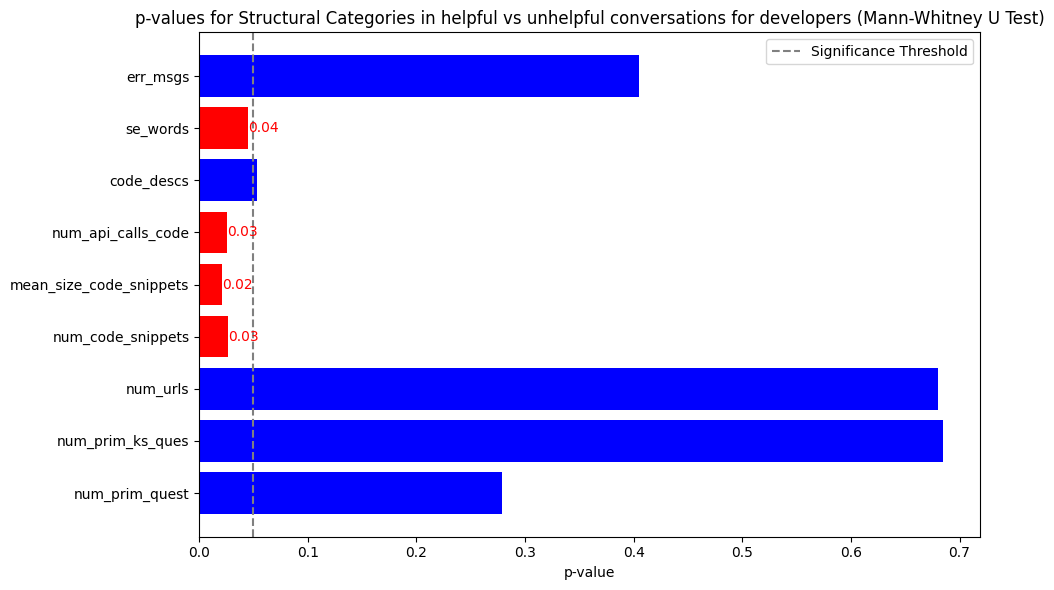

In [54]:
# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(np.arange(len(categories_struct)), p_values, color=['red' if sig else 'blue' for sig in significance])
plt.yticks(np.arange(len(categories_struct)), categories_struct)
plt.xlabel('p-value')
plt.title('p-values for Structural Categories in helpful vs unhelpful conversations for developers (Mann-Whitney U Test)')
plt.axvline(x=0.05, color='gray', linestyle='--', label='Significance Threshold')
plt.legend()

# Add labels with color according to significance
for i, (bar, sig) in enumerate(zip(bars, significance)):
    width = bar.get_width()
    if sig:
        plt.text(width, i, f"{width:.2f}", ha='left', va='center', color='red')

# Show plot
plt.tight_layout()
plt.show()

p-value: 0.024220792920902963
WC: Statistically significant difference

p-value: 0.008646320281453596
Cognition: Statistically significant difference

p-value: 0.008645699643080129
cogproc: Statistically significant difference

p-value: 0.03259956032332841
insight: Statistically significant difference

p-value: 0.0013653972981244756
cause: Statistically significant difference

p-value: 0.01825946343979188
Affect: Statistically significant difference

p-value: 0.023882565167453827
tone_pos: Statistically significant difference

p-value: 0.026844468546149577
polite: Statistically significant difference

p-value: 0.048554984881581706
distinct_words: Statistically significant difference

p-value: 0.2818470277131466
uniq_info: No statistically significant difference

p-value: 0.7927882258680488
misspelled: No statistically significant difference

p-value: 0.04626192564115707
incomplete_count: Statistically significant difference

p-value: 0.7733391092586239
total_text_speak: No statisticall

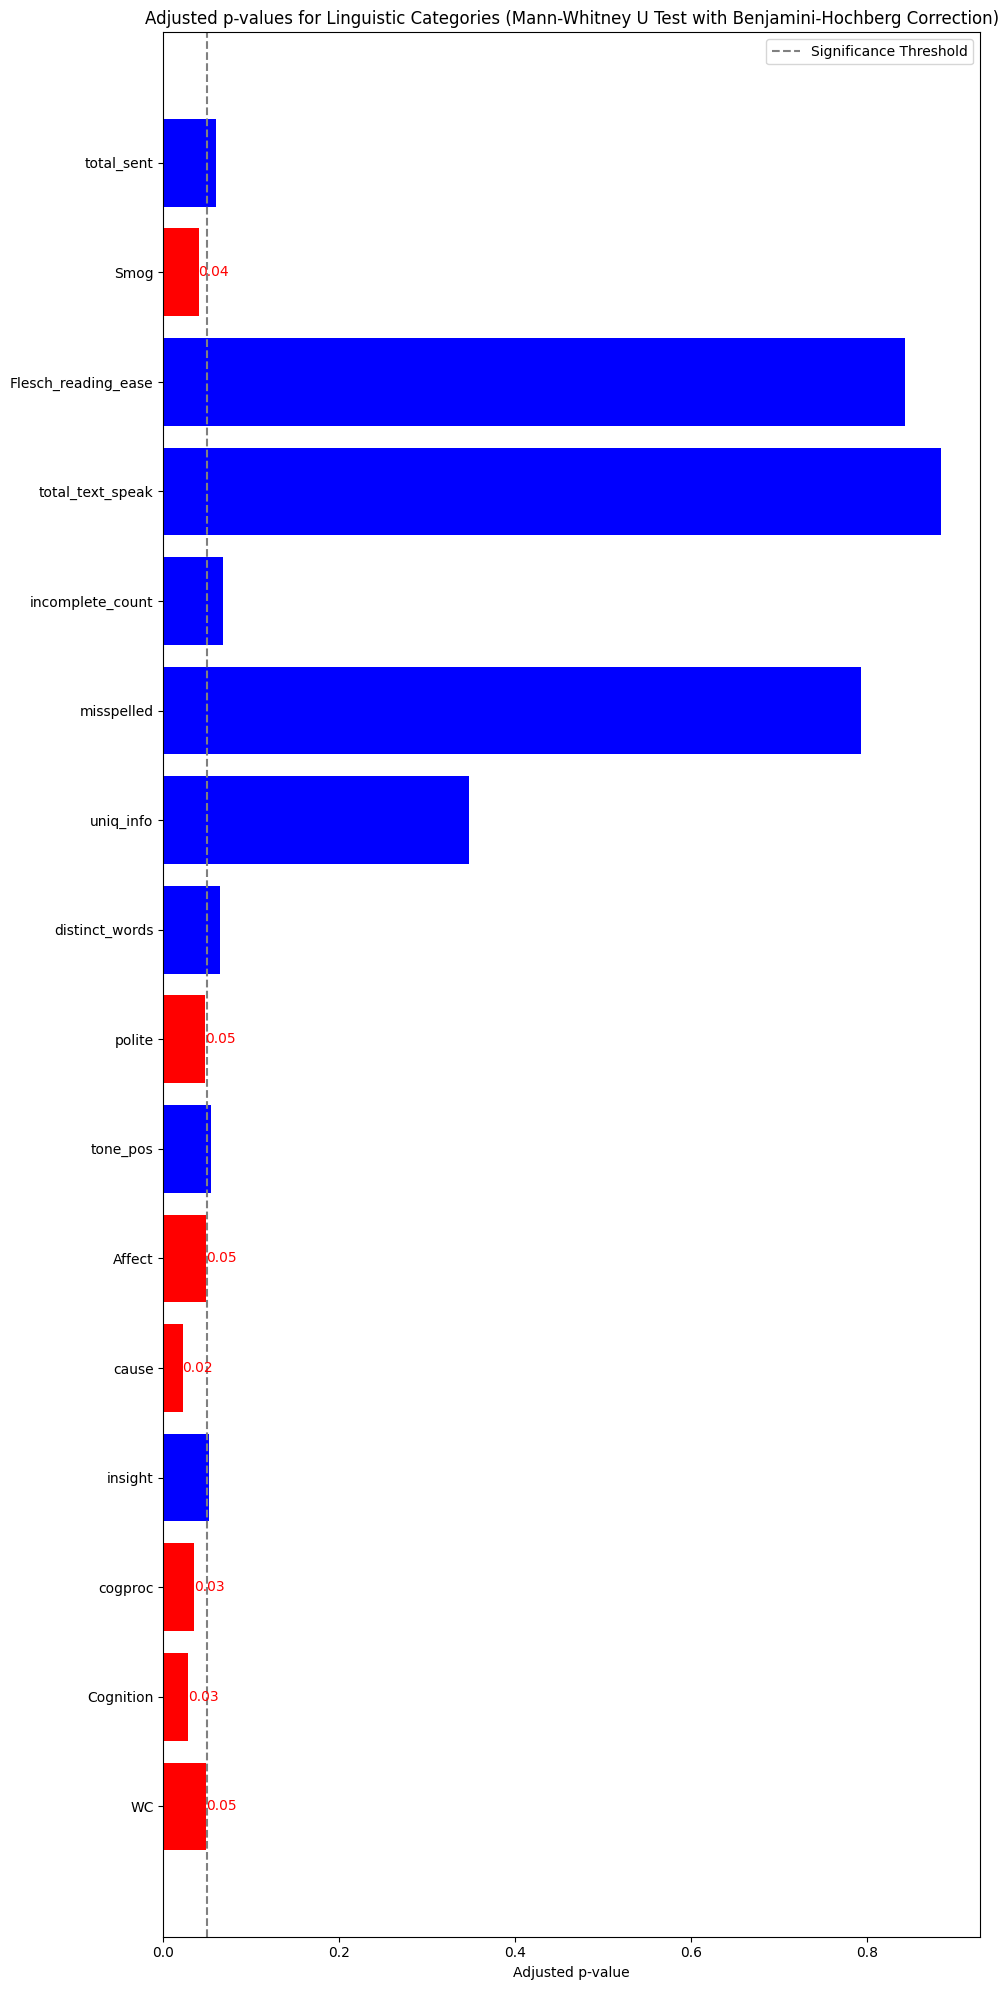

In [55]:
p_values = []
significance = []

# Perform Mann-Whitney U tests for each category and collect p-values
for cat in categories_ling:
    dev_liwc_scores1 = developers_data_help[cat]
    dev_liwc_scores2 = developers_data_no_help[cat]

    _, p_value = mannwhitneyu(dev_liwc_scores1, dev_liwc_scores2, alternative='two-sided')
    p_values.append(p_value)

    # Output results
    print(f"p-value: {p_value}")
    if p_value < 0.05:
        print(cat + ": Statistically significant difference")
    else:
        print(cat + ": No statistically significant difference")
    
    print("")

# Convert p-values to numpy array for sorting
p_values = np.array(p_values)

# Sort the p-values and apply the Benjamini-Hochberg correction
sorted_indices = np.argsort(p_values)
sorted_p_values = p_values[sorted_indices]
m = len(p_values)
adjusted_p_values = np.zeros(m)

# Apply Benjamini-Hochberg formula
for i, p in enumerate(sorted_p_values):
    adjusted_p_values[i] = p * m / (i + 1)

# Ensure that the adjusted p-values are bounded by 1
adjusted_p_values = np.minimum(adjusted_p_values, 1.0)

# Now we map the adjusted p-values back to the original order
adjusted_p_values_original_order = np.zeros(m)
adjusted_p_values_original_order[sorted_indices] = adjusted_p_values

# Update the significance list based on adjusted p-values
significance = adjusted_p_values_original_order < 0.05

print(categories_ling)
print(adjusted_p_values_original_order)

# Plotting
plt.figure(figsize=(10, 20))
bars = plt.barh(np.arange(len(categories_ling)), adjusted_p_values_original_order, 
                color=['red' if sig else 'blue' for sig in significance])
plt.yticks(np.arange(len(categories_ling)), categories_ling)
plt.xlabel('Adjusted p-value')
plt.title('Adjusted p-values for Linguistic Categories (Mann-Whitney U Test with Benjamini-Hochberg Correction)')
plt.axvline(x=0.05, color='gray', linestyle='--', label='Significance Threshold')
plt.legend()

# Add labels with color according to significance
for i, (bar, sig) in enumerate(zip(bars, significance)):
    width = bar.get_width()
    if sig:
        plt.text(width, i, f"{width:.2f}", ha='left', va='center', color='red')

# Show plot
plt.tight_layout()
plt.show()


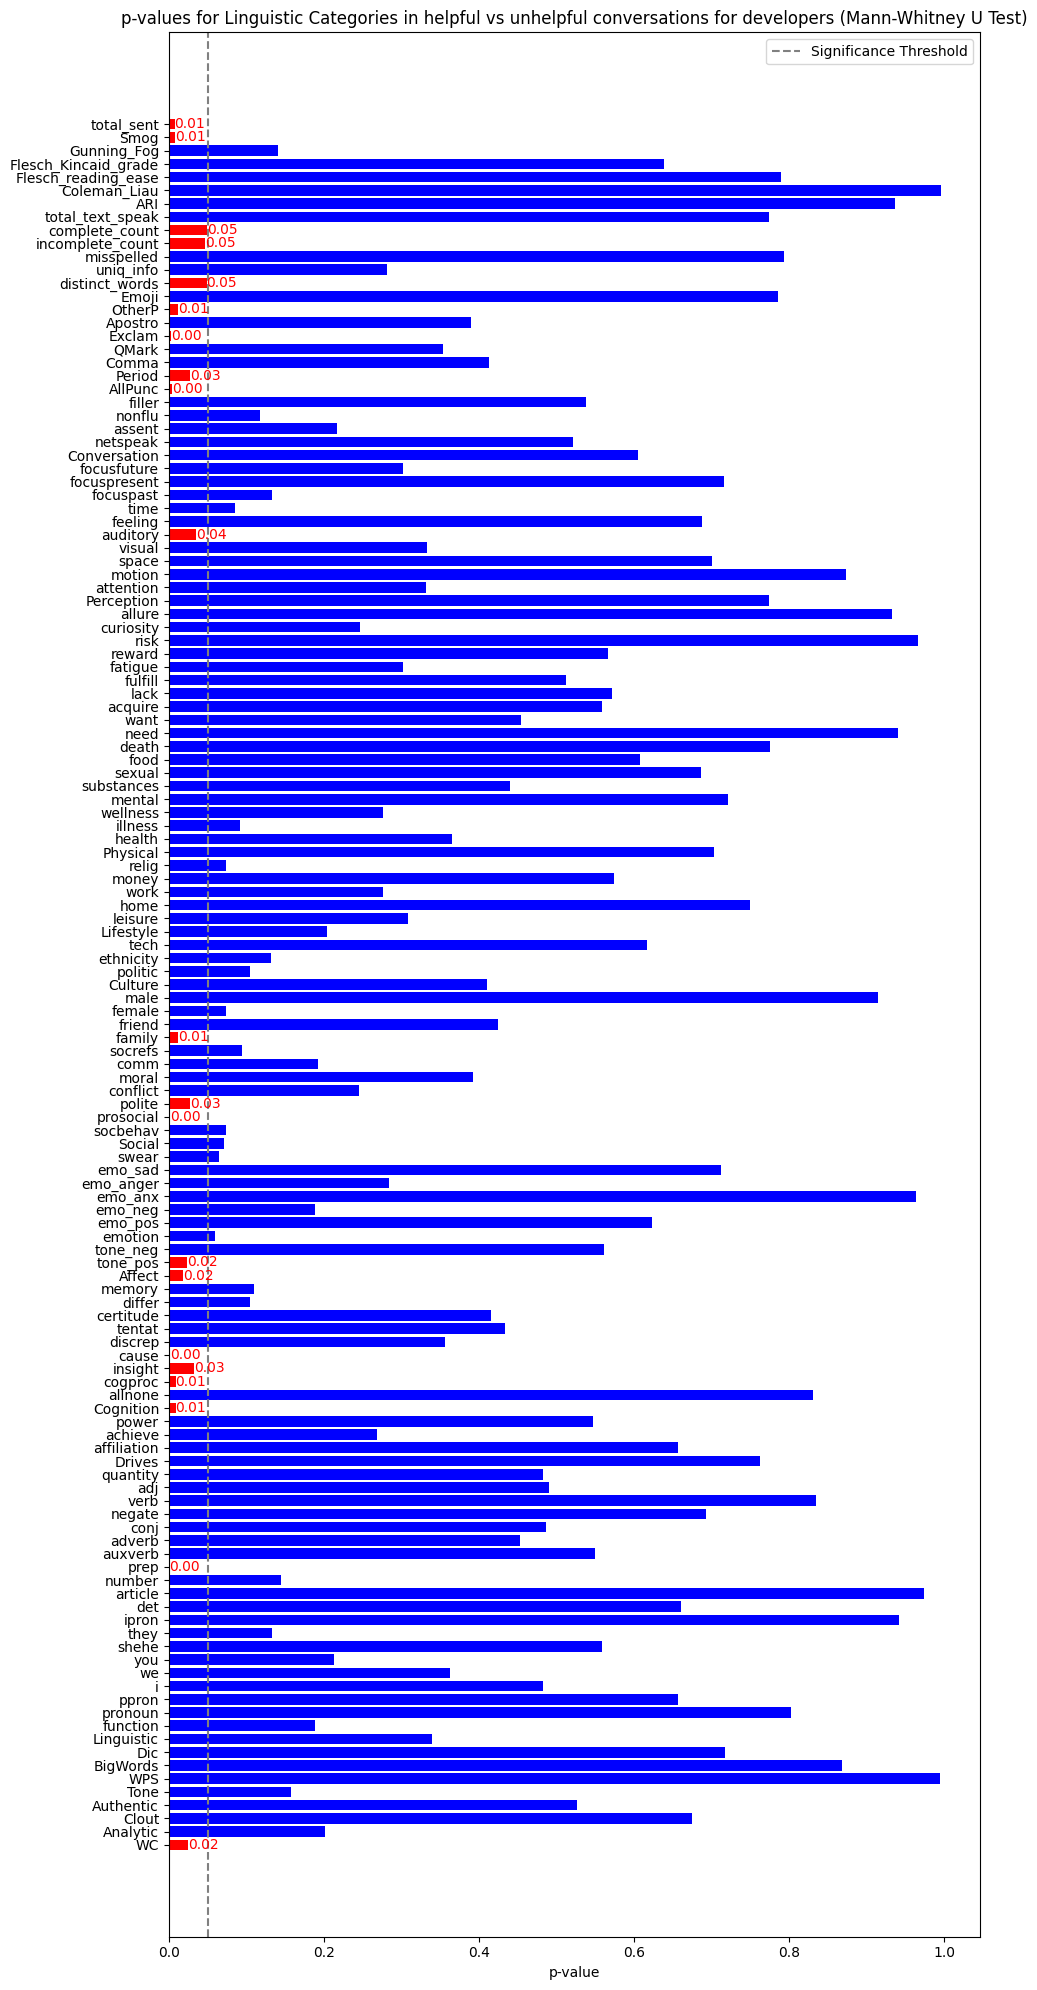

In [9]:
p_values = []
significance = []
for cat in categories_ling:
    dev_liwc_scores1 = developers_data_help[cat]
    dev_liwc_scores2 = developers_data_no_help[cat]


    _, p_value = mannwhitneyu(dev_liwc_scores1, dev_liwc_scores2, alternative='two-sided')
    
    p_values.append(p_value)
    significance.append(p_value < 0.05)
    
# Plotting
plt.figure(figsize=(10, 20))
bars = plt.barh(np.arange(len(categories_ling)), p_values, color=['red' if sig else 'blue' for sig in significance])
plt.yticks(np.arange(len(categories_ling)), categories_ling)
plt.xlabel('p-value')
plt.title('p-values for Linguistic Categories in helpful vs unhelpful conversations for developers (Mann-Whitney U Test)')
plt.axvline(x=0.05, color='gray', linestyle='--', label='Significance Threshold')
plt.legend()

# Add labels with color according to significance
for i, (bar, sig) in enumerate(zip(bars, significance)):
    width = bar.get_width()
    if sig:
        plt.text(width, i, f"{width:.2f}", ha='left', va='center', color='red')

# Show plot
plt.tight_layout()
plt.show()

In [56]:
from scipy.stats import mannwhitneyu
# Lists to store relative differences
relative_differences = []

pos = []
neg = []
# Calculate relative differences for each LIWC category
for cat in categories_struct:
    dev_liwc_scores1 = developers_data_help[cat]
    dev_liwc_scores2 = developers_data_no_help[cat]

    if len(dev_liwc_scores1) == 0 or len(dev_liwc_scores2) == 0:
        print(cat)
    
    mean_dev1 = sum(dev_liwc_scores1) / len(dev_liwc_scores1)
    mean_dev2 = sum(dev_liwc_scores2) / len(dev_liwc_scores2)

    if mean_dev2 == 0.0 and mean_dev1 != 0.0:
        relative_diff = 100
        pos.append(cat)
        relative_differences.append(100)
        continue
    if mean_dev2 == 0.0 and mean_dev1 == 0.0:
        relative_differences.append(0)
        print(cat)
        continue
    
    relative_diff = (mean_dev1 - mean_dev2) / ((mean_dev2))
    if not np.isnan(relative_diff):
        print(cat + " : " + str(relative_diff))
        if relative_diff > 0:
            pos.append(cat)
        elif relative_diff < 0:
            neg.append(cat)

        relative_differences.append(relative_diff)

print("more in helpful:" + str(pos))
print("less in helpful:" + str(neg))

num_prim_quest : 0.22835478751542948
num_prim_ks_ques : -0.020900594732370537
num_urls : 0.16859321200196745
num_code_snippets : 0.11845512892692255
mean_size_code_snippets : -0.13198722757237008
num_api_calls_code : -0.1453977997723901
code_descs : -0.21698229217904577
se_words : -0.17108051270182048
err_msgs : 0.07809130122214233
more in helpful:['num_prim_quest', 'num_urls', 'num_code_snippets', 'err_msgs']
less in helpful:['num_prim_ks_ques', 'mean_size_code_snippets', 'num_api_calls_code', 'code_descs', 'se_words']


In [57]:
from scipy.stats import mannwhitneyu
# Lists to store relative differences
relative_differences = []

pos = []
neg = []
# Calculate relative differences for each LIWC category
for cat in categories_ling:
    dev_liwc_scores1 = developers_data_help[cat]
    dev_liwc_scores2 = developers_data_no_help[cat]

    if len(dev_liwc_scores1) == 0 or len(dev_liwc_scores2) == 0:
        print(cat)
    
    mean_dev1 = sum(dev_liwc_scores1) / len(dev_liwc_scores1)
    mean_dev2 = sum(dev_liwc_scores2) / len(dev_liwc_scores2)

    if mean_dev2 == 0.0 and mean_dev1 != 0.0:
        relative_differences.append(100)
        continue
    if mean_dev2 == 0.0 and mean_dev1 == 0.0:
        relative_differences.append(0)
        print(cat)
        continue
    
    relative_diff = (mean_dev1 - mean_dev2) / ((mean_dev2))
    if not np.isnan(relative_diff):
        print(cat + " : " + str(relative_diff))
        if relative_diff > 0:
            pos.append(cat)
        elif relative_diff < 0:
            neg.append(cat)

        relative_differences.append(relative_diff)

print("more in helpful:" + str(pos))
print("less in helpful:" + str(neg))

WC : -0.42331065198828655
Cognition : -0.09930453311341185
cogproc : -0.10081337751797366
insight : -0.24243357433015197
cause : -0.23477216438953663
Affect : 0.3291328328481687
tone_pos : 0.48277417993719346
polite : 0.7375580251723525
distinct_words : -0.2251898671253859
uniq_info : -0.11170219789571582
misspelled : -0.23922010957138257
incomplete_count : -0.6337645596427421
total_text_speak : 0.5070093457943925
Flesch_reading_ease : 0.03416501638160652
Smog : 0.2011125945705381
total_sent : -0.41783748011533106
more in helpful:['Affect', 'tone_pos', 'polite', 'total_text_speak', 'Flesch_reading_ease', 'Smog']
less in helpful:['WC', 'Cognition', 'cogproc', 'insight', 'cause', 'distinct_words', 'uniq_info', 'misspelled', 'incomplete_count', 'total_sent']


### GPT

In [59]:
df_prompts = df[df['ColumnID'] == 'answers_fulltext_clean']

In [60]:
categories = [
    "WC", "Analytic", "Clout", "Authentic", "Tone", "WPS", "BigWords", "Dic", "Linguistic", "function", "pronoun",
    "ppron", "i", "we", "you", "shehe", "they", "ipron", "det", "article", "number", "prep", "auxverb", "adverb",
    "conj", "negate", "verb", "adj", "quantity", "Drives", "affiliation", "achieve", "power", "Cognition", "allnone",
    "cogproc", "insight", "cause", "discrep", "tentat", "certitude", "differ", "memory", "Affect", "tone_pos", 
    "tone_neg", "emotion", "emo_pos", "emo_neg", "emo_anx", "emo_anger", "emo_sad", "swear", "Social", "socbehav", 
    "prosocial", "polite", "conflict", "moral", "comm", "socrefs", "family", "friend", "female", "male", "Culture", 
    "politic", "ethnicity", "tech", "Lifestyle", "leisure", "home", "work", "money", "relig", "Physical", "health", 
    "illness", "wellness", "mental", "substances", "sexual", "food", "death", "need", "want", "acquire", "lack", 
    "fulfill", "fatigue", "reward", "risk", "curiosity", "allure", "Perception", "attention", "motion", "space", 
    "visual", "auditory", "feeling", "time", "focuspast", "focuspresent", "focusfuture", "Conversation", "netspeak", 
    "assent", "nonflu", "filler", "AllPunc", "Period", "Comma", "QMark", "Exclam", "Apostro", "OtherP", "Emoji", 
    "num_prim_quest", "num_prim_ks_ques", "num_acc_ans", "num_urls", "num_code_snippets", "mean_size_code_snippets", 
    "num_api_calls_text", "num_api_calls_code", "code_descs", "se_words", "err_msgs", "distinct_words", "uniq_info", 
    "misspelled", "incomplete_count", "complete_count", "total_text_speak", "ARI", "Coleman_Liau", "Flesch_reading_ease", 
    "Flesch_Kincaid_grade", "Gunning_Fog", "Smog", "total_sent"
]

developers_data_help = {
    "WC": [], "Analytic": [], "Clout": [], "Authentic": [], "Tone": [], "WPS": [], "BigWords": [], "Dic": [], "Linguistic": [],
    "function": [], "pronoun": [], "ppron": [], "i": [], "we": [], "you": [], "shehe": [], "they": [], "ipron": [], "det": [],
    "article": [], "number": [], "prep": [], "auxverb": [], "adverb": [], "conj": [], "negate": [], "verb": [], "adj": [],
    "quantity": [], "Drives": [], "affiliation": [], "achieve": [], "power": [], "Cognition": [], "allnone": [], "cogproc": [],
    "insight": [], "cause": [], "discrep": [], "tentat": [], "certitude": [], "differ": [], "memory": [], "Affect": [], "tone_pos": [],
    "tone_neg": [], "emotion": [], "emo_pos": [], "emo_neg": [], "emo_anx": [], "emo_anger": [], "emo_sad": [], "swear": [],
    "Social": [], "socbehav": [], "prosocial": [], "polite": [], "conflict": [], "moral": [], "comm": [], "socrefs": [], "family": [],
    "friend": [], "female": [], "male": [], "Culture": [], "politic": [], "ethnicity": [], "tech": [], "Lifestyle": [], "leisure": [],
    "home": [], "work": [], "money": [], "relig": [], "Physical": [], "health": [], "illness": [], "wellness": [], "mental": [],
    "substances": [], "sexual": [], "food": [], "death": [], "need": [], "want": [], "acquire": [], "lack": [], "fulfill": [],
    "fatigue": [], "reward": [], "risk": [], "curiosity": [], "allure": [], "Perception": [], "attention": [], "motion": [], "space": [],
    "visual": [], "auditory": [], "feeling": [], "time": [], "focuspast": [], "focuspresent": [], "focusfuture": [], "Conversation": [],
    "netspeak": [], "assent": [], "nonflu": [], "filler": [], "AllPunc": [], "Period": [], "Comma": [], "QMark": [], "Exclam": [],
    "Apostro": [], "OtherP": [], "Emoji": [], "num_prim_quest": [], "num_prim_ks_ques": [], "num_acc_ans": [], "num_urls": [],
    "num_code_snippets": [], "mean_size_code_snippets": [], "num_api_calls_text": [], "num_api_calls_code": [], "code_descs": [],
    "se_words": [], "err_msgs": [], "distinct_words": [], "uniq_info": [], "misspelled": [], "incomplete_count": [], "complete_count": [],
    "total_text_speak": [], "ARI": [], "Coleman_Liau": [], "Flesch_reading_ease": [], "Flesch_Kincaid_grade": [], "Gunning_Fog": [],
    "Smog": [], "total_sent": []
}
developers_data_no_help = {
    "WC": [], "Analytic": [], "Clout": [], "Authentic": [], "Tone": [], "WPS": [], "BigWords": [], "Dic": [], "Linguistic": [],
    "function": [], "pronoun": [], "ppron": [], "i": [], "we": [], "you": [], "shehe": [], "they": [], "ipron": [], "det": [],
    "article": [], "number": [], "prep": [], "auxverb": [], "adverb": [], "conj": [], "negate": [], "verb": [], "adj": [],
    "quantity": [], "Drives": [], "affiliation": [], "achieve": [], "power": [], "Cognition": [], "allnone": [], "cogproc": [],
    "insight": [], "cause": [], "discrep": [], "tentat": [], "certitude": [], "differ": [], "memory": [], "Affect": [], "tone_pos": [],
    "tone_neg": [], "emotion": [], "emo_pos": [], "emo_neg": [], "emo_anx": [], "emo_anger": [], "emo_sad": [], "swear": [],
    "Social": [], "socbehav": [], "prosocial": [], "polite": [], "conflict": [], "moral": [], "comm": [], "socrefs": [], "family": [],
    "friend": [], "female": [], "male": [], "Culture": [], "politic": [], "ethnicity": [], "tech": [], "Lifestyle": [], "leisure": [],
    "home": [], "work": [], "money": [], "relig": [], "Physical": [], "health": [], "illness": [], "wellness": [], "mental": [],
    "substances": [], "sexual": [], "food": [], "death": [], "need": [], "want": [], "acquire": [], "lack": [], "fulfill": [],
    "fatigue": [], "reward": [], "risk": [], "curiosity": [], "allure": [], "Perception": [], "attention": [], "motion": [], "space": [],
    "visual": [], "auditory": [], "feeling": [], "time": [], "focuspast": [], "focuspresent": [], "focusfuture": [], "Conversation": [],
    "netspeak": [], "assent": [], "nonflu": [], "filler": [], "AllPunc": [], "Period": [], "Comma": [], "QMark": [], "Exclam": [],
    "Apostro": [], "OtherP": [], "Emoji": [], "num_prim_quest": [], "num_prim_ks_ques": [], "num_acc_ans": [], "num_urls": [],
    "num_code_snippets": [], "mean_size_code_snippets": [], "num_api_calls_text": [], "num_api_calls_code": [], "code_descs": [],
    "se_words": [], "err_msgs": [], "distinct_words": [], "uniq_info": [], "misspelled": [], "incomplete_count": [], "complete_count": [],
    "total_text_speak": [], "ARI": [], "Coleman_Liau": [], "Flesch_reading_ease": [], "Flesch_Kincaid_grade": [], "Gunning_Fog": [],
    "Smog": [], "total_sent": []
}

for index, row in df_prompts.iterrows():
    for cat in categories:
        if not np.isnan(row[cat]):
            if row['Did ChatGPT help with the issue'] == 'No':
                developers_data_no_help[cat].append(row[cat])
            elif row['Did ChatGPT help with the issue'] == 'Yes':
                developers_data_help[cat].append(row[cat])

In [61]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

p_values = []
significance = []

categories_struct = ["num_prim_quest", "num_prim_ks_ques", "num_urls", "num_code_snippets", "mean_size_code_snippets", 
 "num_api_calls_code", "code_descs", "se_words", "err_msgs"]
categories_ling = ["WC", "Cognition", "cogproc", "insight", "cause", "Affect", "tone_pos", "polite","distinct_words", "uniq_info", "misspelled", "incomplete_count", "total_text_speak", "Flesch_reading_ease", "Smog", "total_sent"]


for cat in categories_struct:
    dev_liwc_scores1 = developers_data_help[cat]
    dev_liwc_scores2 = developers_data_no_help[cat]


    _, p_value = mannwhitneyu(dev_liwc_scores1, dev_liwc_scores2, alternative='two-sided')

    # Output results
    print(f"p-value: {p_value}")
    if p_value < 0.05:
        print(cat + ": Statistically significant difference")
    else:
        print(cat + ": No statistically significant difference")
    
    p_values.append(p_value)
    significance.append(p_value < 0.05)
    
    print("")

p-value: 0.8673871413974952
num_prim_quest: No statistically significant difference

p-value: 0.0666208417203894
num_prim_ks_ques: No statistically significant difference

p-value: 0.5892564062942115
num_urls: No statistically significant difference

p-value: 0.02592059939547282
num_code_snippets: Statistically significant difference

p-value: 0.20238985554408206
mean_size_code_snippets: No statistically significant difference

p-value: 0.8844254909135866
num_api_calls_code: No statistically significant difference

p-value: 0.10472391436727603
code_descs: No statistically significant difference

p-value: 0.4203301273043114
se_words: No statistically significant difference

p-value: 1.0
err_msgs: No statistically significant difference



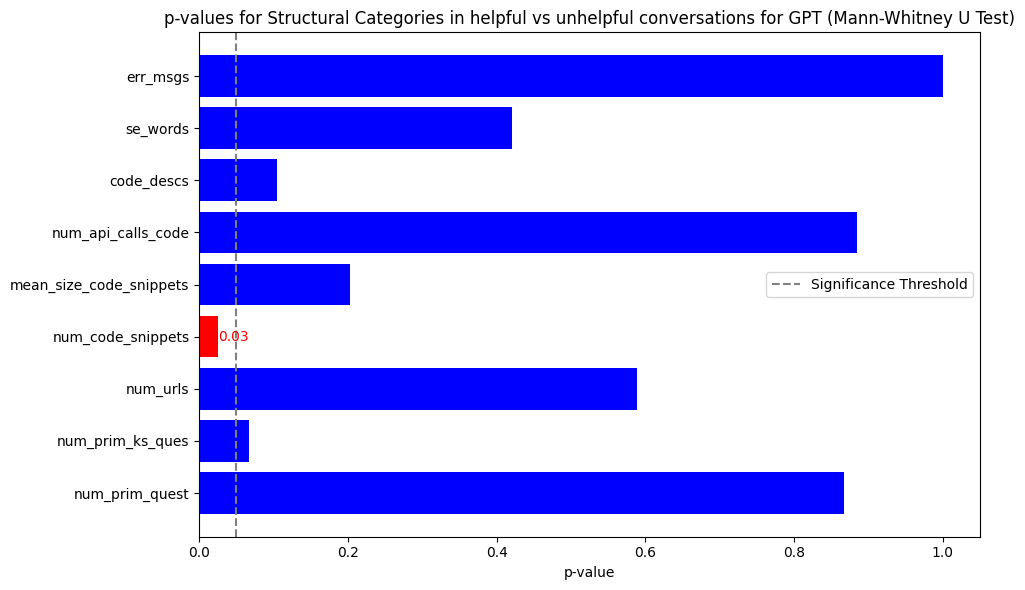

In [62]:
# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(np.arange(len(categories_struct)), p_values, color=['red' if sig else 'blue' for sig in significance])
plt.yticks(np.arange(len(categories_struct)), categories_struct)
plt.xlabel('p-value')
plt.title('p-values for Structural Categories in helpful vs unhelpful conversations for GPT (Mann-Whitney U Test)')
plt.axvline(x=0.05, color='gray', linestyle='--', label='Significance Threshold')
plt.legend()

# Add labels with color according to significance
for i, (bar, sig) in enumerate(zip(bars, significance)):
    width = bar.get_width()
    if sig:
        plt.text(width, i, f"{width:.2f}", ha='left', va='center', color='red')

# Show plot
plt.tight_layout()
plt.show()

p-value: 0.7550296163198796
WC: No statistically significant difference

p-value: 0.12187591507864577
Cognition: No statistically significant difference

p-value: 0.09051020145078649
cogproc: No statistically significant difference

p-value: 0.30733434505015234
insight: No statistically significant difference

p-value: 0.12713845578477748
cause: No statistically significant difference

p-value: 0.9424379508878484
Affect: No statistically significant difference

p-value: 0.6414122609654185
tone_pos: No statistically significant difference

p-value: 0.0927030650507278
polite: No statistically significant difference

p-value: 0.7447728562768009
distinct_words: No statistically significant difference

p-value: 0.9118018808265321
uniq_info: No statistically significant difference

p-value: 0.34473790942780946
misspelled: No statistically significant difference

p-value: 0.842335297739031
incomplete_count: No statistically significant difference

p-value: 0.8865043068363377
total_text_speak:

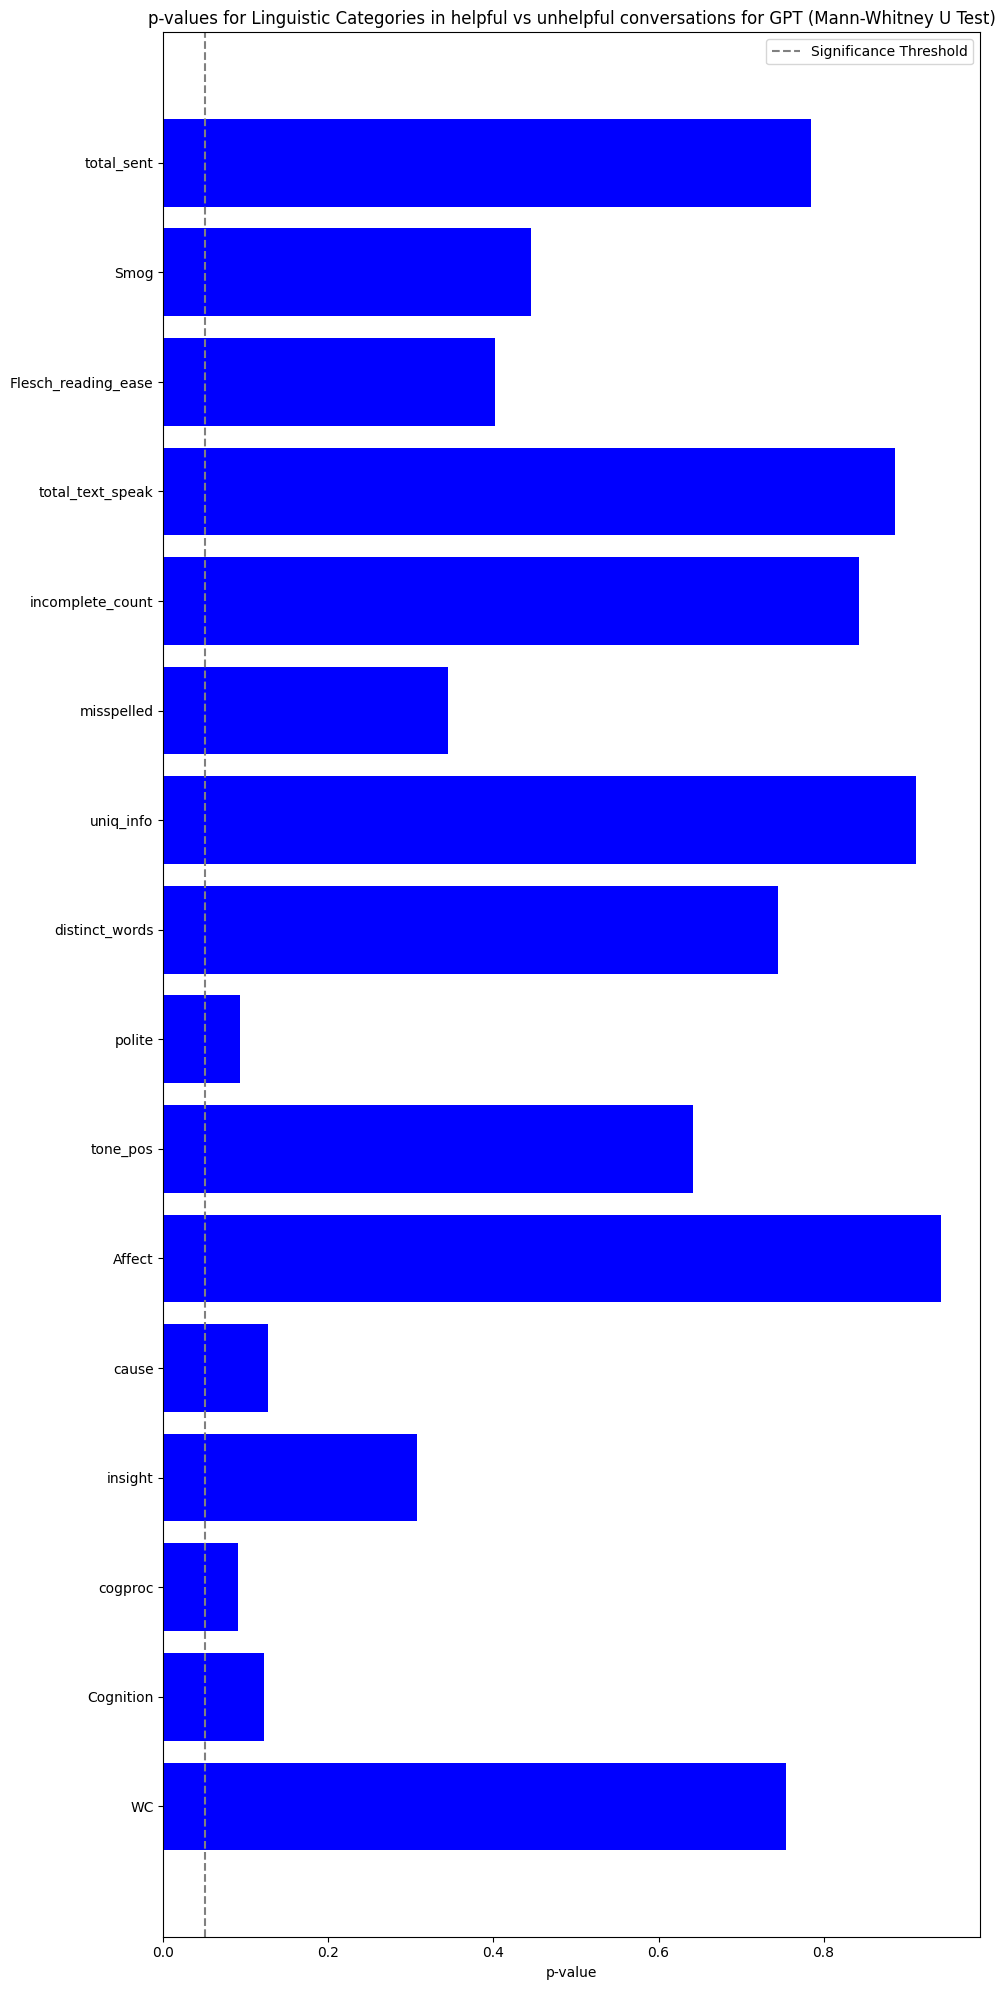

In [64]:
categories_struct = ["num_prim_quest", "num_prim_ks_ques", "num_urls", "num_code_snippets", "mean_size_code_snippets", 
 "num_api_calls_code", "code_descs", "se_words", "err_msgs"]
categories_ling = ["WC", "Cognition", "cogproc", "insight", "cause", "Affect", "tone_pos", "polite","distinct_words", "uniq_info", "misspelled", "incomplete_count", "total_text_speak", "Flesch_reading_ease", "Smog", "total_sent"]
p_values = []
significance = []
for cat in categories_ling:
    dev_liwc_scores1 = developers_data_help[cat]
    dev_liwc_scores2 = developers_data_no_help[cat]


    _, p_value = mannwhitneyu(dev_liwc_scores1, dev_liwc_scores2, alternative='two-sided')
    
    p_values.append(p_value)
    significance.append(p_value < 0.05)
    # Output results
    print(f"p-value: {p_value}")
    if p_value < 0.05:
        print(cat + ": Statistically significant difference")
    else:
        print(cat + ": No statistically significant difference")
    print("")
    
# Plotting
plt.figure(figsize=(10, 20))
bars = plt.barh(np.arange(len(categories_ling)), p_values, color=['red' if sig else 'blue' for sig in significance])
plt.yticks(np.arange(len(categories_ling)), categories_ling)
plt.xlabel('p-value')
plt.title('p-values for Linguistic Categories in helpful vs unhelpful conversations for GPT (Mann-Whitney U Test)')
plt.axvline(x=0.05, color='gray', linestyle='--', label='Significance Threshold')
plt.legend()

# Add labels with color according to significance
for i, (bar, sig) in enumerate(zip(bars, significance)):
    width = bar.get_width()
    if sig:
        plt.text(width, i, f"{width:.2f}", ha='left', va='center', color='red')

# Show plot
plt.tight_layout()
plt.show()

In [65]:
from scipy.stats import mannwhitneyu
import numpy as np

p_values = []
significance = []

categories_struct = ["num_prim_quest", "num_prim_ks_ques", "num_urls", "num_code_snippets", "mean_size_code_snippets", 
 "num_api_calls_code", "code_descs", "se_words", "err_msgs"]
categories_ling = ["WC", "Cognition", "cogproc", "insight", "cause", "Affect", "tone_pos", "polite","distinct_words", "uniq_info", "misspelled", "incomplete_count", "total_text_speak", "Flesch_reading_ease", "Smog", "total_sent"]
# Combine categories
categories = categories_struct

# Perform Mann-Whitney U tests and collect p-values
for cat in categories:
    dev_liwc_scores1 = developers_data_help[cat]
    dev_liwc_scores2 = developers_data_no_help[cat]

    _, p_value = mannwhitneyu(dev_liwc_scores1, dev_liwc_scores2, alternative='two-sided')
    p_values.append(p_value)

# Convert p-values to numpy array for sorting
p_values = np.array(p_values)

# Sort the p-values and apply the Benjamini-Hochberg correction
sorted_indices = np.argsort(p_values)
sorted_p_values = p_values[sorted_indices]
m = len(p_values)
adjusted_p_values = np.zeros(m)

# Apply Benjamini-Hochberg formula
for i, p in enumerate(sorted_p_values):
    adjusted_p_values[i] = p * m / (i + 1)

# Ensure that the adjusted p-values are bounded by 1
adjusted_p_values = np.minimum(adjusted_p_values, 1.0)

# Now we map the adjusted p-values back to the original order
adjusted_p_values_original_order = np.zeros(m)
adjusted_p_values_original_order[sorted_indices] = adjusted_p_values

# Update the p_values list with adjusted p-values and populate significance
for i, adj_p_value in enumerate(adjusted_p_values_original_order):
    p_values[i] = adj_p_value  # Update the p-values list with the adjusted ones
    significance.append(adj_p_value < 0.05)  # Significant if p-value < 0.05

    # Output results
    print(f"{categories[i]} - Adjusted p-value: {adj_p_value}")
    if adj_p_value < 0.05:
        print(f"{categories[i]}: Statistically significant after Benjamini-Hochberg correction")
    else:
        print(f"{categories[i]}: No statistically significant difference after Benjamini-Hochberg correction")
    print("")


num_prim_quest - Adjusted p-value: 1.0
num_prim_quest: No statistically significant difference after Benjamini-Hochberg correction

num_prim_ks_ques - Adjusted p-value: 0.2997937877417523
num_prim_ks_ques: No statistically significant difference after Benjamini-Hochberg correction

num_urls - Adjusted p-value: 0.8838846094413172
num_urls: No statistically significant difference after Benjamini-Hochberg correction

num_code_snippets - Adjusted p-value: 0.23328539455925537
num_code_snippets: No statistically significant difference after Benjamini-Hochberg correction

mean_size_code_snippets - Adjusted p-value: 0.4553771749741846
mean_size_code_snippets: No statistically significant difference after Benjamini-Hochberg correction

num_api_calls_code - Adjusted p-value: 0.9949786772777849
num_api_calls_code: No statistically significant difference after Benjamini-Hochberg correction

code_descs - Adjusted p-value: 0.3141717431018281
code_descs: No statistically significant difference after 

In [67]:
p_values = []
significance = []

# Perform Mann-Whitney U tests for each category and collect p-values
for cat in categories_ling:
    dev_liwc_scores1 = developers_data_help[cat]
    dev_liwc_scores2 = developers_data_no_help[cat]

    _, p_value = mannwhitneyu(dev_liwc_scores1, dev_liwc_scores2, alternative='two-sided')
    p_values.append(p_value)

# Convert p-values to numpy array for sorting
p_values = np.array(p_values)

# Sort the p-values and apply the Benjamini-Hochberg correction
sorted_indices = np.argsort(p_values)
sorted_p_values = p_values[sorted_indices]
m = len(p_values)
adjusted_p_values = np.zeros(m)

# Apply Benjamini-Hochberg formula
for i, p in enumerate(sorted_p_values):
    adjusted_p_values[i] = p * m / (i + 1)

# Ensure that the adjusted p-values are bounded by 1
adjusted_p_values = np.minimum(adjusted_p_values, 1.0)

# Now we map the adjusted p-values back to the original order
adjusted_p_values_original_order = np.zeros(m)
adjusted_p_values_original_order[sorted_indices] = adjusted_p_values

# Update the significance list based on adjusted p-values
significance = adjusted_p_values_original_order < 0.05

print(categories_ling)
print(adjusted_p_values_original_order)


['WC', 'Cognition', 'cogproc', 'insight', 'cause', 'Affect', 'tone_pos', 'polite', 'distinct_words', 'uniq_info', 'misspelled', 'incomplete_count', 'total_text_speak', 'Flesch_reading_ease', 'Smog', 'total_sent']
[1.         0.65000488 1.         0.9834699  0.50855382 0.94243795
 1.         0.74162452 1.         0.97258867 0.91930109 1.
 1.         0.91942823 0.89046251 1.        ]


In [41]:
from scipy.stats import mannwhitneyu
# Lists to store relative differences
relative_differences = []

pos = []
neg = []
# Calculate relative differences for each LIWC category
for cat in categories_struct:
    dev_liwc_scores1 = developers_data_help[cat]
    dev_liwc_scores2 = developers_data_no_help[cat]

    if len(dev_liwc_scores1) == 0 or len(dev_liwc_scores2) == 0:
        print(cat)
    
    mean_dev1 = sum(dev_liwc_scores1) / len(dev_liwc_scores1)
    mean_dev2 = sum(dev_liwc_scores2) / len(dev_liwc_scores2)

    if mean_dev2 == 0.0 and mean_dev1 != 0.0:
        relative_diff = 100
        pos.append(cat)
        relative_differences.append(100)
        continue
    if mean_dev2 == 0.0 and mean_dev1 == 0.0:
        relative_differences.append(0)
        print(cat)
        continue
    
    relative_diff = (mean_dev1 - mean_dev2) / ((mean_dev2))
    if not np.isnan(relative_diff):
        print(cat + " : " + str(relative_diff))
        if relative_diff > 0:
            pos.append(cat)
        elif relative_diff < 0:
            neg.append(cat)

        relative_differences.append(relative_diff)

print("more in helpful:" + str(pos))
print("less in helpful:" + str(neg))

num_prim_quest : -0.3747872007782372
num_prim_ks_ques : -0.5615972812234494
num_acc_ans : -1.0
num_urls : -0.1789397357396069
num_code_snippets : 0.28840576393338946
mean_size_code_snippets : 0.04358189451424854
num_api_calls_text : 0.14966281414662697
num_api_calls_code : -0.023636415680325137
code_descs : 0.0511095204753319
se_words : 0.0014565256826764338
err_msgs
more in helpful:['num_code_snippets', 'mean_size_code_snippets', 'num_api_calls_text', 'code_descs', 'se_words']
less in helpful:['num_prim_quest', 'num_prim_ks_ques', 'num_acc_ans', 'num_urls', 'num_api_calls_code']


In [42]:
from scipy.stats import mannwhitneyu
# Lists to store relative differences
relative_differences = []

pos = []
neg = []
# Calculate relative differences for each LIWC category
for cat in categories_ling:
    dev_liwc_scores1 = developers_data_help[cat]
    dev_liwc_scores2 = developers_data_no_help[cat]

    if len(dev_liwc_scores1) == 0 or len(dev_liwc_scores2) == 0:
        print(cat)
    
    mean_dev1 = sum(dev_liwc_scores1) / len(dev_liwc_scores1)
    mean_dev2 = sum(dev_liwc_scores2) / len(dev_liwc_scores2)

    if mean_dev2 == 0.0 and mean_dev1 != 0.0:
        relative_differences.append(100)
        continue
    if mean_dev2 == 0.0 and mean_dev1 == 0.0:
        relative_differences.append(0)
        print(cat)
        continue
    
    relative_diff = (mean_dev1 - mean_dev2) / ((mean_dev2))
    if not np.isnan(relative_diff):
        print(cat + " : " + str(relative_diff))
        if relative_diff > 0:
            pos.append(cat)
        elif relative_diff < 0:
            neg.append(cat)

        relative_differences.append(relative_diff)

print("more in helpful:" + str(pos))
print("less in helpful:" + str(neg))

WC : 0.01482761169560498
Analytic : -0.008910342832638479
Clout : 0.012575035232135302
Authentic : 0.08002504255011987
Tone : -0.010363238931187579
WPS : 0.04469113381929515
BigWords : -0.03865472576140072
Dic : 0.0042194537474439155
Linguistic : -0.0070315317341571775
function : -0.004010226697830018
pronoun : 0.027567233931361897
ppron : 0.027613474741791252
i : -0.025428365672812182
we : -0.08749015866546919
you : 0.03887531729904132
shehe : 0.42895706892057955
they : 0.01817777291551169
ipron : 0.0275045009379345
det : 0.011219665397254207
article : -0.00441324570012315
number : -0.0073721300673448955
prep : -0.01563243814180757
auxverb : -0.010444441678711192
adverb : 0.0031988516824444833
conj : -0.005054513781606354
negate : 0.029540609270028145
verb : -0.013198696496800492
adj : -0.037095655459782474
quantity : 0.08028524297285501
Drives : -0.055246277963047125
affiliation : -0.12284416063924469
achieve : -0.07940782893336473
power : 0.0039268609252595165
Cognition : -0.0307073

# RQ2, Repo Parameters

In [82]:
import pandas as pd
from scipy.stats import mannwhitneyu

combined_df = pd.read_csv('../datasets/conversations_repo_parameters.csv')
# Separate the data based on the "Did ChatGPT help with the issue" column
combined_df_helpful = combined_df[combined_df["Did ChatGPT help with the issue"] == "Yes"]
combined_df_unhelpful = combined_df[combined_df["Did ChatGPT help with the issue"] == "No"]

# Features to compare
dev_features = [
    "user_public_repos", "user_followers", "user_account_age_years", "user_contributions"
]
repo_features = [
    "stars", "contributors", "forks", "num_files", "num_lines",
]

results = []
p_values = []
# Perform Mann-Whitney U test and calculate the relative difference
for feature in dev_features:
    stat, p_value = mannwhitneyu(combined_df_helpful[feature].dropna(), combined_df_unhelpful[feature].dropna())
    median_helpful = combined_df_helpful[feature].median()
    median_unhelpful = combined_df_unhelpful[feature].median()
    relative_difference = (median_helpful - median_unhelpful) / ((median_helpful))
    
    higher_in = "Helpful" if relative_difference > 0 else "Unhelpful"
    
    results.append({
        "Feature": feature,
        "P-Value": p_value,
        "Median (Helpful)": median_helpful,
        "Median (Unhelpful)": median_unhelpful,
        "Relative Difference": relative_difference,
        "Higher in": higher_in
    })
    p_values.append(p_value)

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)
results_df.head(n=10)

,Feature,P-Value,Median (Helpful),Median (Unhelpful),Relative Difference,Higher in
0,user_public_repos,0.183136,45.5,37.0,0.186813,Helpful
1,user_followers,0.103014,29.0,22.0,0.241379,Helpful
2,user_account_age_years,0.051008,10.0,9.0,0.100000,Helpful
3,user_contributions,0.030934,20.0,19.0,0.050000,Helpful


In [83]:
p_values = np.array(p_values)

# Sort the p-values and apply the Benjamini-Hochberg correction
sorted_indices = np.argsort(p_values)
sorted_p_values = p_values[sorted_indices]
m = len(p_values)
adjusted_p_values = np.zeros(m)

# Apply Benjamini-Hochberg formula
for i, p in enumerate(sorted_p_values):
    adjusted_p_values[i] = p * m / (i + 1)

# Ensure that the adjusted p-values are bounded by 1
adjusted_p_values = np.minimum(adjusted_p_values, 1.0)

# Now we map the adjusted p-values back to the original order
adjusted_p_values_original_order = np.zeros(m)
adjusted_p_values_original_order[sorted_indices] = adjusted_p_values

# Update the significance based on adjusted p-values
results_df["Adjusted P-Value"] = adjusted_p_values_original_order
results_df["Significant"] = adjusted_p_values_original_order < 0.05

# Display the updated results
results_df.head(n=10)

,Feature,P-Value,Median (Helpful),Median (Unhelpful),Relative Difference,Higher in,Adjusted P-Value,Significant
0,user_public_repos,0.183136,45.5,37.0,0.186813,Helpful,0.183136,False
1,user_followers,0.103014,29.0,22.0,0.241379,Helpful,0.137352,False
2,user_account_age_years,0.051008,10.0,9.0,0.100000,Helpful,0.102015,False
3,user_contributions,0.030934,20.0,19.0,0.050000,Helpful,0.123735,False


# RQ2, Discourse

### Lexico-semantic

In [ ]:
df_help = df[df['Did ChatGPT help with the issue'] == 'Yes']
df_no_help = df[df['Did ChatGPT help with the issue'] == 'No']

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')  # You can choose other models as well

In [ ]:
# Adapted from https://gist.github.com/winzig/8894715

url_re = r"""
(?xi)
\b
(                                       # Capture 1: entire matched URL
  (?:
    https?:                             # URL protocol and colon
    (?:
      /{1,3}                            # 1-3 slashes
      |                                 #   or
      [a-z0-9%]                         # Single letter or digit or '%'
                                        # (Trying not to match e.g. "URI::Escape")
    )
    |                                   #   or
                                        # looks like domain name followed by a slash:
    [a-z0-9.\-]+[.]
    (?:[a-z]{2,13})
    /
  )
  (?:                                   # One or more:
    [^\s()<>{}\[\]]+                    # Run of non-space, non-()<>{}[]
    |                                   #   or
    \([^\s()]*?\([^\s()]+\)[^\s()]*?\)  # balanced parens, one level deep: (…(…)…)
    |
    \([^\s]+?\)                         # balanced parens, non-recursive: (…)
  )+
  (?:                                   # End with:
    \([^\s()]*?\([^\s()]+\)[^\s()]*?\)  # balanced parens, one level deep: (…(…)…)
    |
    \([^\s]+?\)                         # balanced parens, non-recursive: (…)
    |                                   #   or
    [^\s`!()\[\]{};:'".,<>?«»“”‘’]      # not a space or one of these punct chars
  )
  |                                     # OR, the following to match naked domains:
  (?:\b
    (?<![@.])                           # not preceded by a @, avoid matching foo@_gmail.com_
    [a-z0-9]+
    (?:[.\-][a-z0-9]+)*
    [.]
    (?:[a-z]{2,13})
    \b
    /?
    (?!@)                               # not succeeded by a @, avoid matching "foo.na" in "foo.na@example.com"
    /                                   # nkraft: followed by a slash to avoid field or method accesses (e.g., Set.size)
  )
)
"""

import pandas as pd
import re

def replace_code_error(prompts, codes, code_blocks, errors):
    for i in range(len(prompts)):
        for code in codes:
            if len(code) == 0 or len(code) == 1:
                continue
            prompts[i] = prompts[i].replace(code, '[CODE]', 1)
        for code_block in code_blocks:
            if len(code_block) == 0 or len(code_block) == 1:
                continue
            prompts[i] = prompts[i].replace(code_block, '[CODE]', 1)
        for error in errors:
            if len(error) == 0 or len(error) == 1:
                continue
            prompts[i] = prompts[i].replace(error, '[ERROR]', 1)
        prompts[i] = re.sub(url_re, '[URL]', prompts[i])
    return prompts

def replace_code(answers, codes):
    for i in range(len(answers)):
        for code in codes:
            if len(code) == 0 or len(code) == 1:
                continue
            answers[i] = answers[i].replace(code, '[CODE]', 1)
        answers[i] = re.sub(url_re, '[URL]', answers[i])
    return answers

# Create new columns for cleaned prompts and answers
df['prompts_list_clean'] = df.apply(lambda row: replace_code_error(row['prompts'], row['prompts_codes'], row['prompts_code_blocks'], row['prompts_errors']), axis=1)
df['answers_list_clean'] = df.apply(lambda row: replace_code(row['answers'], row['answers_codes']), axis=1)

df.head(n=10)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Assuming df_help and df_no_help have 'prompts' and 'answers' columns with lists of prompts and answers

def calculate_cumulative_cosine_similarity(prompts, answers):
    prompt_embeddings = [model.encode(prompt) for prompt in prompts]
    answer_embeddings = [model.encode(answer) for answer in answers]
    
    cumulative_prompt_embedding = np.zeros_like(prompt_embeddings[0])
    cumulative_answer_embedding = np.zeros_like(answer_embeddings[0])
    
    similarities = []
    for i in range(0, len(prompts)):
        if i >= len(answers):
            break
        cumulative_prompt_embedding += prompt_embeddings[i]
        cumulative_answer_embedding += answer_embeddings[i]
        similarity = cosine_similarity([cumulative_prompt_embedding], [cumulative_answer_embedding])[0][0]
        similarities.append(similarity)
    
    return similarities

# Calculate cumulative cosine similarity for each conversation
cumulative_similarity_help = []
cumulative_similarity_no_help = []

for _, row in df_help.iterrows():
    if row['ColumnID'] == 'prompts_fulltext_clean':
        print(_)
        similarity_progression = calculate_cumulative_cosine_similarity(row['prompts_list_clean'], row['answers_list_clean'])
        cumulative_similarity_help.append(similarity_progression)

for _, row in df_no_help.iterrows():
    if row['ColumnID'] == 'prompts_fulltext_clean':
        print(_)
        similarity_progression = calculate_cumulative_cosine_similarity(row['prompts_list_clean'], row['answers_list_clean'])
        cumulative_similarity_no_help.append(similarity_progression)

### Topic coherence

In [ ]:
import pandas as pd
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply preprocessing to lists of prompts and answers
df_help['processed_prompts_coherence'] = df_help['prompts_list_clean'].apply(lambda x: [preprocess(p) for p in x])
df_help['processed_answers_coherence'] = df_help['answers_list_clean'].apply(lambda x: [preprocess(a) for a in x])
df_no_help['processed_prompts_coherence'] = df_no_help['prompts_list_clean'].apply(lambda x: [preprocess(p) for p in x])
df_no_help['processed_answers_coherence'] = df_no_help['answers_list_clean'].apply(lambda x: [preprocess(a) for a in x])

In [ ]:
# Function to calculate coherence score for a list of processed texts
def calculate_coherence(processed_texts):
    dictionary = Dictionary(processed_texts)
    corpus = [dictionary.doc2bow(text) for text in processed_texts]
    lda_model = LdaModel(corpus, num_topics=1, id2word=dictionary, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()


# Calculate coherence progression considering at most the last two pairs of prompts and answers
def calculate_coherence_progression(processed_prompts, processed_answers):
    coherence_scores = {'prompt+answer': []}
    cumulative_prompts = []
    cumulative_answers = []

    for prompt, answer in zip(processed_prompts, processed_answers):
        cumulative_prompts.append(prompt)
        cumulative_answers.append(answer)

        # Consider at most the last two pairs
        if len(cumulative_prompts) > 2:
            texts_to_consider = cumulative_prompts[-2:] + cumulative_answers[-2:]
            # print(texts_to_consider)
            # break
        else:
            texts_to_consider = cumulative_prompts + cumulative_answers

        coherence_scores['prompt+answer'].append(calculate_coherence(texts_to_consider))

    return coherence_scores

# Initialize lists to store coherence progressions
coherence_progression_help = []
coherence_progression_no_help = []

# Calculate coherence progressions for helpful conversations
for idx, row in df_help.iterrows():
    print(idx)
    coherence_scores = calculate_coherence_progression(row['processed_prompts_coherence'], row['processed_answers_coherence'])
    coherence_progression_help.append(coherence_scores)

# Calculate coherence progressions for unhelpful conversations
for idx, row in df_no_help.iterrows():
    print(idx)
    coherence_scores = calculate_coherence_progression(row['processed_prompts_coherence'], row['processed_answers_coherence'])
    coherence_progression_no_help.append(coherence_scores)

In [ ]:
coherence_progression_help_without_dup = [item for index, item in enumerate(coherence_progression_help) if index % 2 == 0]
coherence_progression_no_help_without_dup = [item for index, item in enumerate(coherence_progression_no_help) if index % 2 == 0]

### LSM

In [ ]:
new_df = pd.read_csv('../datasets/conversation_analysis/LIWC_conversation_progression.csv')

categories = [
    "article", "conj", "ipron", "negate", "prep", "adverb", "auxverb", "ppron"
]

# Initialize cumulative similarity lists
cumulative_lsm_help = []
cumulative_lsm_no_help = []

# Iterate over each chat_id to calculate LSM progressively
for chat_id, group in new_df.groupby('chat_id'):
    # Separate the prompts and answers
    prompts = group[group['ColumnID'] == 'prompt'].sort_values('step')
    answers = group[group['ColumnID'] == 'answer'].sort_values('step')

    # Initialize cumulative lists
    cum_help = []
    cum_no_help = []

    # Iterate through steps
    for step in range(1, len(prompts) + 1):
        lsm_scores = []
        
        # Calculate LSM for prompt-answer, answer-next prompt, and so on
        if step == 1:
            prompt_val = prompts.iloc[step-1]
            answer_val = answers.iloc[step-1]
            for category in categories:
                prompt_category_val = prompt_val[category]
                answer_category_val = answer_val[category]
                lsm = 1 - abs(prompt_category_val - answer_category_val) / (prompt_category_val + answer_category_val + 0.0001)
                lsm_scores.append(lsm)
            lsm_avg = sum(lsm_scores) / len(lsm_scores)

            if prompts.iloc[step-1]['help'] == 'Yes':
                cum_help.append(lsm_avg)
            else:
                cum_no_help.append(lsm_avg)
        else:
            prompt_val = prompts.iloc[step-1]
            answer_val = answers.iloc[step-1]

            for category in categories:
                prompt_category_val = prompt_val[category]
                answer_category_val = answer_val[category]
                lsm = 1 - abs(prompt_category_val - answer_category_val) / (prompt_category_val + answer_category_val + 0.0001)
                lsm_scores.append(lsm)
            lsm_avg = sum(lsm_scores) / len(lsm_scores)

            if prompts.iloc[step-1]['help'] == 'Yes':
                cum_help.append(lsm_avg)
            else:
                cum_no_help.append(lsm_avg)
            
            prompt_val = prompts.iloc[step-1]
            answer_val = answers.iloc[step-2]
            for category in categories:
                prompt_category_val = prompt_val[category]
                answer_category_val = answer_val[category]
                lsm = 1 - abs(prompt_category_val - answer_category_val) / (prompt_category_val + answer_category_val + 0.0001)
                lsm_scores.append(lsm)
            lsm_avg = sum(lsm_scores) / len(lsm_scores)
            if prompts.iloc[step-1]['help'] == 'Yes':
                cum_help.append(lsm_avg)
            else:
                cum_no_help.append(lsm_avg)
    if len(cum_help) != 0:
        cumulative_lsm_help.append(cum_help)
    if len(cum_no_help) != 0:
        cumulative_lsm_no_help.append(cum_no_help)

### plot

In [14]:
import pickle

# Load the dictionaries
with open('../pickle_files/topic_coherence_help.pkl', 'rb') as file:
    coherence_progression_help_without_dup = pickle.load(file)

with open('../pickle_files/topic_coherence_no_help.pkl', 'rb') as file:
    coherence_progression_no_help_without_dup = pickle.load(file)

with open('../pickle_files/lss_help.pkl', 'rb') as file:
    cumulative_similarity_help = pickle.load(file)

with open('../pickle_files/lss_no_help.pkl', 'rb') as file:
    cumulative_similarity_no_help = pickle.load(file)

with open('../pickle_files/lsm_help.pkl', 'rb') as file:
    cumulative_lsm_help = pickle.load(file)

with open('../pickle_files/lsm_no_help.pkl', 'rb') as file:
    cumulative_lsm_no_help = pickle.load(file)

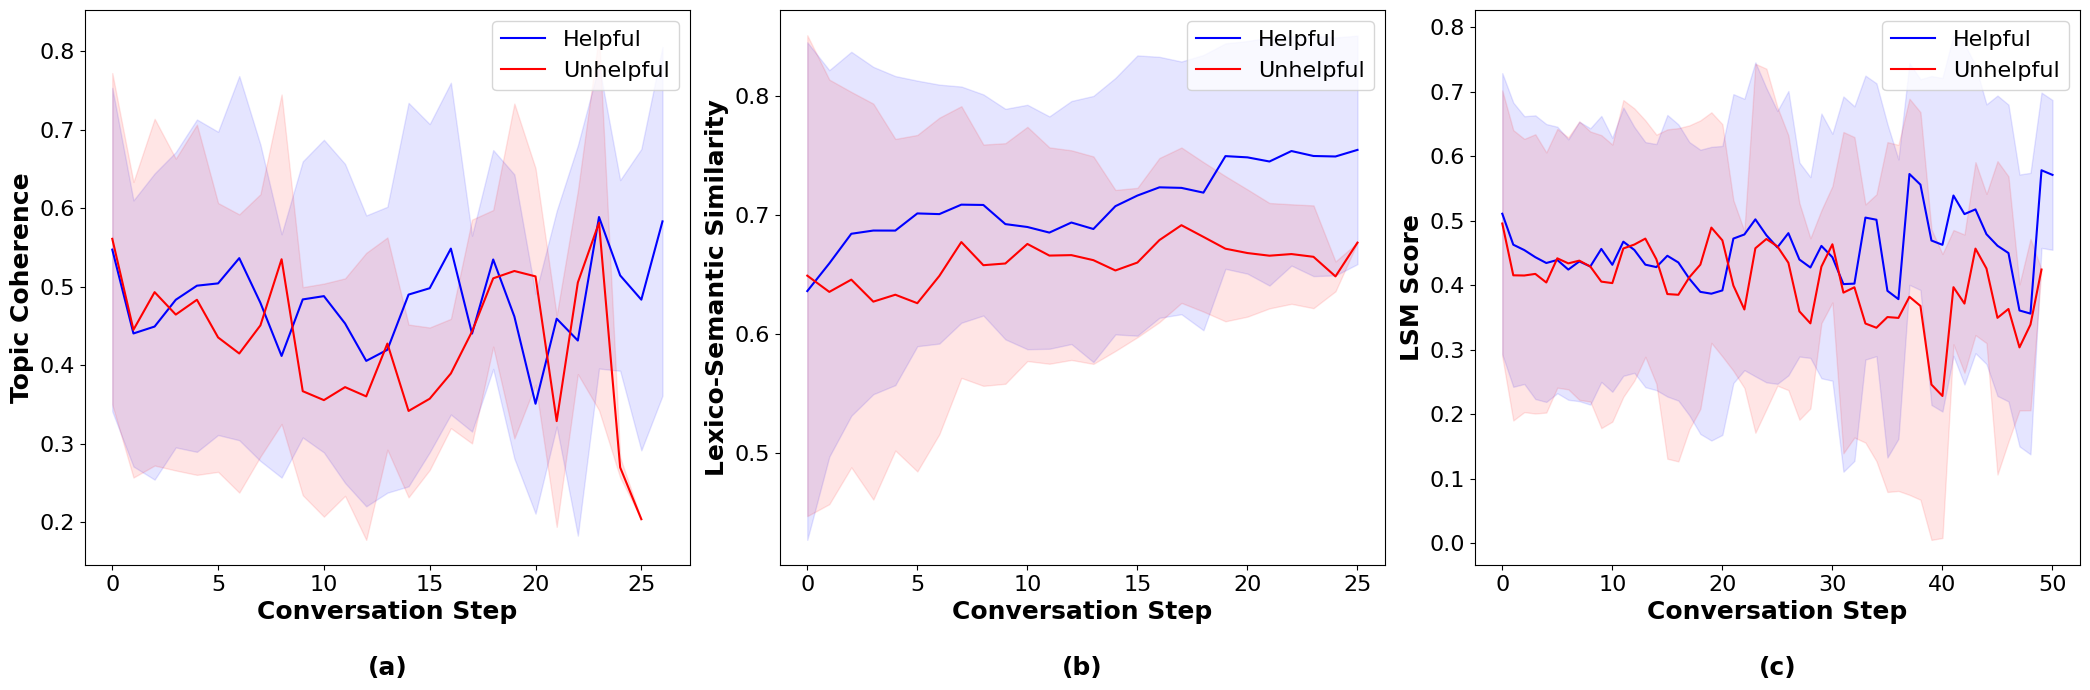

In [58]:
# import numpy as np
# import matplotlib.pyplot as plt

def calculate_average_progression1(coherence_progressions, n=0):
    max_length = max(len(scores['prompt+answer']) for scores in coherence_progressions) - n
    avg_prompts = np.zeros(max_length)
    std_prompts = np.zeros(max_length)
    
    for i in range(max_length):
        step_prompts = [scores['prompt+answer'][i] for scores in coherence_progressions if i < len(scores['prompt+answer'])]
        avg_prompts[i] = np.mean(step_prompts)
        std_prompts[i] = np.std(step_prompts)
    
    return avg_prompts, std_prompts

# Define the function to calculate average progression and standard deviation
def calculate_average_progression(lsm_progressions, n=0):
    max_length = max(len(similarity) for similarity in lsm_progressions)-n
    avg_similarity = np.zeros(max_length)
    std_similarity = np.zeros(max_length)
    
    for i in range(max_length):
        step_similarities = [similarity[i] for similarity in lsm_progressions if i < len(similarity)]
        avg_similarity[i] = np.mean(step_similarities)
        std_similarity[i] = np.std(step_similarities)
    
    return avg_similarity, std_similarity

# Calculate average and std for coherence
avg_prompts_help, std_prompts_help = calculate_average_progression1(coherence_progression_help_without_dup, 82)
avg_prompts_no_help, std_prompts_no_help = calculate_average_progression1(coherence_progression_no_help_without_dup, 15)

# Calculate average and std for cosine similarity
avg_similarity_help, std_similarity_help = calculate_average_progression(cumulative_similarity_help, 83)
avg_similarity_no_help, std_similarity_no_help = calculate_average_progression(cumulative_similarity_no_help, 15)

# Calculate average and std for LSM
avg_lsm_help, std_lsm_help = calculate_average_progression(cumulative_lsm_help, 166)
avg_lsm_no_help, std_lsm_no_help = calculate_average_progression(cumulative_lsm_no_help, 31)

# Plot the subplots
fig, axs = plt.subplots(1, 3, figsize=(21, 7))

# Subplot 1: Coherence progression
axs[0].plot(avg_prompts_help, label='Helpful', color='blue')
axs[0].fill_between(range(len(avg_prompts_help)), avg_prompts_help - std_prompts_help, avg_prompts_help + std_prompts_help, color='blue', alpha=0.1)
axs[0].plot(avg_prompts_no_help, label='Unhelpful', color='red')
axs[0].fill_between(range(len(avg_prompts_no_help)), avg_prompts_no_help - std_prompts_no_help, avg_prompts_no_help + std_prompts_no_help, color='red', alpha=0.1)
# axs[0].set_title('', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Conversation Step\n\n(a)', fontsize=18, fontweight='bold')
axs[0].set_ylabel('Topic Coherence', fontsize=18, fontweight='bold')
axs[0].legend(fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=16)

# Subplot 2: Cosine similarity progression
axs[1].plot(avg_similarity_help, label='Helpful', color='blue')
axs[1].fill_between(range(len(avg_similarity_help)), avg_similarity_help - std_similarity_help, avg_similarity_help + std_similarity_help, color='blue', alpha=0.1)
axs[1].plot(avg_similarity_no_help, label='Unhelpful', color='red')
axs[1].fill_between(range(len(avg_similarity_no_help)), avg_similarity_no_help - std_similarity_no_help, avg_similarity_no_help + std_similarity_no_help, color='red', alpha=0.1)
# axs[1].set_title('(b)', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Conversation Step\n\n(b)', fontsize=18, fontweight='bold')
axs[1].set_ylabel('Lexico-Semantic Similarity', fontsize=18, fontweight='bold')
axs[1].legend(fontsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=16)

# Subplot 3: LSM progression
axs[2].plot(avg_lsm_help, label='Helpful', color='blue')
axs[2].fill_between(range(len(avg_lsm_help)), avg_lsm_help - std_lsm_help, avg_lsm_help + std_lsm_help, color='blue', alpha=0.1)
axs[2].plot(avg_lsm_no_help, label='Unhelpful', color='red')
axs[2].fill_between(range(len(avg_lsm_no_help)), avg_lsm_no_help - std_lsm_no_help, avg_lsm_no_help + std_lsm_no_help, color='red', alpha=0.1)
# axs[2].set_title('(c)', fontsize=16, fontweight='bold')
axs[2].set_xlabel('Conversation Step\n\n(c)', fontsize=18, fontweight='bold')
axs[2].set_ylabel('Linguistic Style Matching', fontsize=18, fontweight='bold')
axs[2].legend(fontsize=16)
axs[2].tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
# plt.xticks(fontsize=10, fontweight='bold')
# plt.yticks(fontsize=10, fontweight='bold')
plt.savefig('../progression_plots_horizontal.png', bbox_inches='tight', dpi=300)
plt.show()

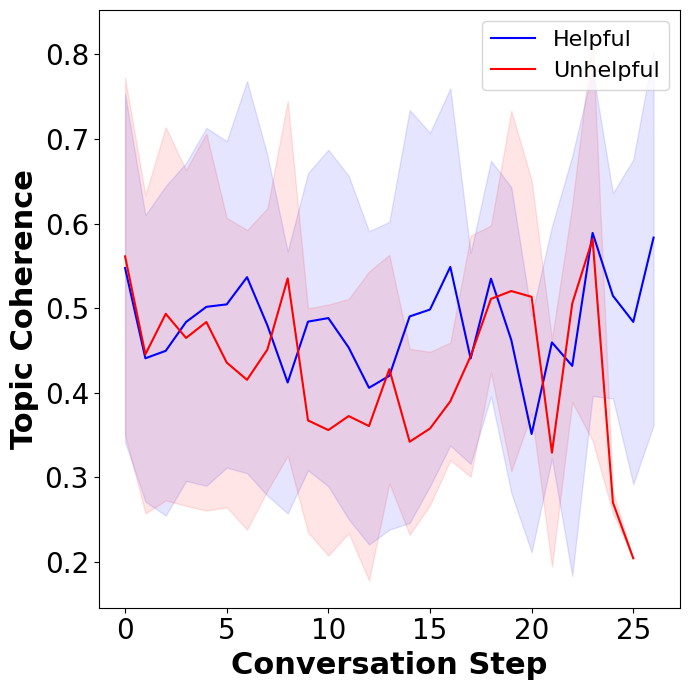

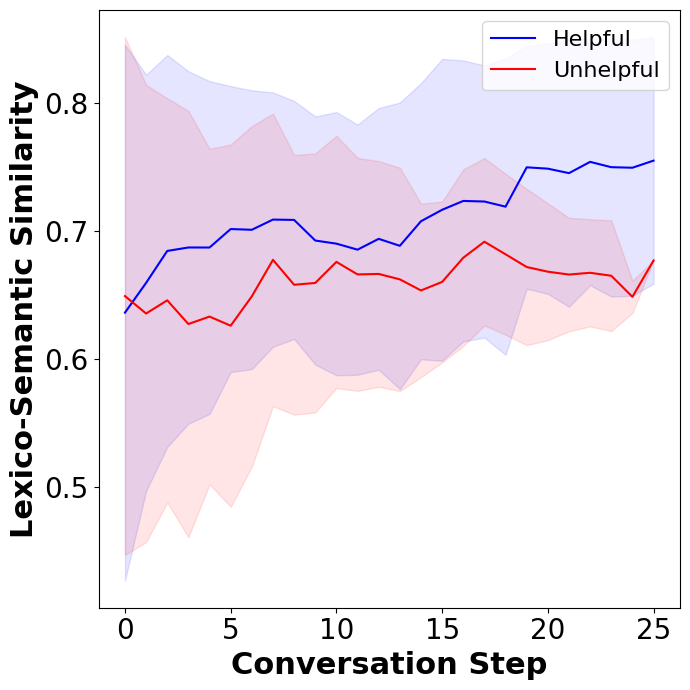

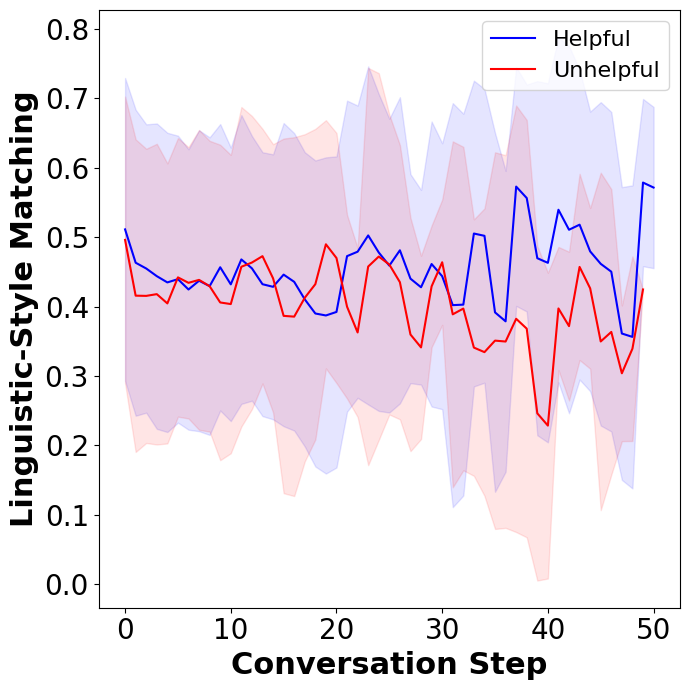

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate average progression and standard deviation for coherence
def calculate_average_progression1(coherence_progressions, n=0):
    max_length = max(len(scores['prompt+answer']) for scores in coherence_progressions) - n
    avg_prompts = np.zeros(max_length)
    std_prompts = np.zeros(max_length)
    
    for i in range(max_length):
        step_prompts = [scores['prompt+answer'][i] for scores in coherence_progressions if i < len(scores['prompt+answer'])]
        avg_prompts[i] = np.mean(step_prompts)
        std_prompts[i] = np.std(step_prompts)
    
    return avg_prompts, std_prompts

# Function to calculate average progression and standard deviation for LSM and similarity
def calculate_average_progression(lsm_progressions, n=0):
    max_length = max(len(similarity) for similarity in lsm_progressions)-n
    avg_similarity = np.zeros(max_length)
    std_similarity = np.zeros(max_length)
    
    for i in range(max_length):
        step_similarities = [similarity[i] for similarity in lsm_progressions if i < len(similarity)]
        avg_similarity[i] = np.mean(step_similarities)
        std_similarity[i] = np.std(step_similarities)
    
    return avg_similarity, std_similarity

# Calculate average and std for coherence
avg_prompts_help, std_prompts_help = calculate_average_progression1(coherence_progression_help_without_dup, 82)
avg_prompts_no_help, std_prompts_no_help = calculate_average_progression1(coherence_progression_no_help_without_dup, 15)

# Calculate average and std for cosine similarity
avg_similarity_help, std_similarity_help = calculate_average_progression(cumulative_similarity_help, 83)
avg_similarity_no_help, std_similarity_no_help = calculate_average_progression(cumulative_similarity_no_help, 15)

# Calculate average and std for LSM
avg_lsm_help, std_lsm_help = calculate_average_progression(cumulative_lsm_help, 166)
avg_lsm_no_help, std_lsm_no_help = calculate_average_progression(cumulative_lsm_no_help, 31)

# Plot and save Coherence progression
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(avg_prompts_help, label='Helpful', color='blue')
ax.fill_between(range(len(avg_prompts_help)), avg_prompts_help - std_prompts_help, avg_prompts_help + std_prompts_help, color='blue', alpha=0.1)
ax.plot(avg_prompts_no_help, label='Unhelpful', color='red')
ax.fill_between(range(len(avg_prompts_no_help)), avg_prompts_no_help - std_prompts_no_help, avg_prompts_no_help + std_prompts_no_help, color='red', alpha=0.1)
ax.set_xlabel('Conversation Step', fontsize=22, fontweight='bold')
ax.set_ylabel('Topic Coherence', fontsize=22, fontweight='bold')
ax.legend(fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.savefig('../coherence_progression.png', bbox_inches='tight', dpi=300)
# plt.show()

# Plot and save Cosine similarity progression
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(avg_similarity_help, label='Helpful', color='blue')
ax.fill_between(range(len(avg_similarity_help)), avg_similarity_help - std_similarity_help, avg_similarity_help + std_similarity_help, color='blue', alpha=0.1)
ax.plot(avg_similarity_no_help, label='Unhelpful', color='red')
ax.fill_between(range(len(avg_similarity_no_help)), avg_similarity_no_help - std_similarity_no_help, avg_similarity_no_help + std_similarity_no_help, color='red', alpha=0.1)
ax.set_xlabel('Conversation Step', fontsize=22, fontweight='bold')
ax.set_ylabel('Lexico-Semantic Similarity', fontsize=22, fontweight='bold')
ax.legend(fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.savefig('../cosine_similarity_progression.png', bbox_inches='tight', dpi=300)
# plt.show()

# Plot and save LSM progression
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(avg_lsm_help, label='Helpful', color='blue')
ax.fill_between(range(len(avg_lsm_help)), avg_lsm_help - std_lsm_help, avg_lsm_help + std_lsm_help, color='blue', alpha=0.1)
ax.plot(avg_lsm_no_help, label='Unhelpful', color='red')
ax.fill_between(range(len(avg_lsm_no_help)), avg_lsm_no_help - std_lsm_no_help, avg_lsm_no_help + std_lsm_no_help, color='red', alpha=0.1)
ax.set_xlabel('Conversation Step', fontsize=22, fontweight='bold')
ax.set_ylabel('Linguistic-Style Matching', fontsize=22, fontweight='bold')
ax.legend(fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.savefig('../lsm_progression.png', bbox_inches='tight', dpi=300)
# plt.show()


# RQ3

In [64]:
df_rq3 = pd.read_csv('../datasets/final_annotated_conversations.csv')

In [65]:
len(df_rq3)

686

In [66]:
count_irrelevant = df_rq3['Deficiencies'].str.contains('Irrelevant').sum()
count_incorrect = df_rq3['Deficiencies'].str.contains('Incorrect').sum()
count_comp = df_rq3['Deficiencies'].str.contains('Not comprehensive').sum()
count_unresolved = df_rq3['Deficiencies'].str.contains('Not solved').sum()
count_unresolved += (df_rq3['Deficiencies'] == '-').sum()
count_hallucination = df_rq3['Deficiencies'].str.contains('Hallucination').sum()
count_unclear = df_rq3['Deficiencies'].str.contains('Unclear').sum()

count_not_helpful = df_rq3['Did ChatGPT help with the issue'].str.contains('No').sum()
count_helpful = df_rq3['Did ChatGPT help with the issue'].str.contains('Yes').sum()

print('Helpful: ' + str(count_helpful))
print('Not helpful: ' + str(count_not_helpful))
print('Irrelevant: ' + str(count_irrelevant))
print('Incorrect: ' + str(count_incorrect))
print('Not comprehensive: ' + str(count_comp))
print('Unclear: ' + str(count_unclear))
print('Hallucination: ' + str(count_hallucination))
print('Unresolved: ' + str(count_unresolved))


Helpful: 428
Not helpful: 258
Irrelevant: 19
Incorrect: 54
Not comprehensive: 39
Unclear: 14
Hallucination: 11
Unresolved: 121


In [56]:
from collections import defaultdict
import json

# Initialize the dictionary
task_issues_dict = defaultdict(lambda: defaultdict(int))

# Iterate through the DataFrame and update the dictionary
for _, row in df_rq3.iterrows():
    issue = row['Deficiencies']
    task1 = row['Type of issue/Problem (#1)']
    task2 = row['Type of issue/Problem (#2)']
    
    # Update the dictionary for both task columns
    if pd.notna(task1):
        if 'Irrelevant' in str(issue):
            task_issues_dict[task1]['Irrelevant'] += 1
        elif 'Incorrect' in str(issue):
            task_issues_dict[task1]['Incorrect'] += 1
        elif 'Not comprehensive' in str(issue):
            task_issues_dict[task1]['Not comprehensive'] += 1
        elif 'Unclear' in str(issue):
            task_issues_dict[task1]['Unclear'] += 1
        elif 'Hallucination' in str(issue):
            task_issues_dict[task1]['Hallucination'] += 1
        elif 'Not solved' in str(issue):
            task_issues_dict[task1]['Not solved'] += 1
        elif str(issue) == '-':
            task_issues_dict[task1]['Not solved'] += 1
    if pd.notna(task2) and not (task1 == 'tool/library/api recommendation' and task2 == 'tool/library/api recommendation'):
        if 'Irrelevant' in str(issue):
            task_issues_dict[task2]['Irrelevant'] += 1
        elif 'Incorrect' in str(issue):
            task_issues_dict[task2]['Incorrect'] += 1
        elif 'Not comprehensive' in str(issue):
            task_issues_dict[task2]['Not comprehensive'] += 1
        elif 'Unclear' in str(issue):
            task_issues_dict[task1]['Unclear'] += 1
        elif 'Hallucination' in str(issue):
            task_issues_dict[task2]['Hallucination'] += 1
        elif 'Not solved' in str(issue):
            task_issues_dict[task2]['Not solved'] += 1
        elif str(issue) == '-':
            task_issues_dict[task2]['Not solved'] += 1

print(json.dumps(task_issues_dict, indent=4))

{
    "code generation and implementation": {
        "Not solved": 47,
        "Incorrect": 12,
        "Not comprehensive": 7,
        "Irrelevant": 6,
        "Hallucination": 1
    },
    "tool/library/api recommendation": {
        "Irrelevant": 8,
        "Not solved": 29,
        "Incorrect": 23,
        "Hallucination": 5,
        "Not comprehensive": 8,
        "Unclear": 5
    },
    "debugging and code repair": {
        "Not solved": 19,
        "Incorrect": 13,
        "Irrelevant": 3,
        "Not comprehensive": 3,
        "Hallucination": 1,
        "Unclear": 1
    },
    "information retrieval": {
        "Not solved": 20,
        "Unclear": 5,
        "Hallucination": 4,
        "Not comprehensive": 15,
        "Irrelevant": 4
    },
    "system design and architecture": {
        "Not comprehensive": 1,
        "Not solved": 1
    },
    "code documentation/comment generation": {
        "Not solved": 1
    },
    "code explanation": {
        "Not solved": 5,
     

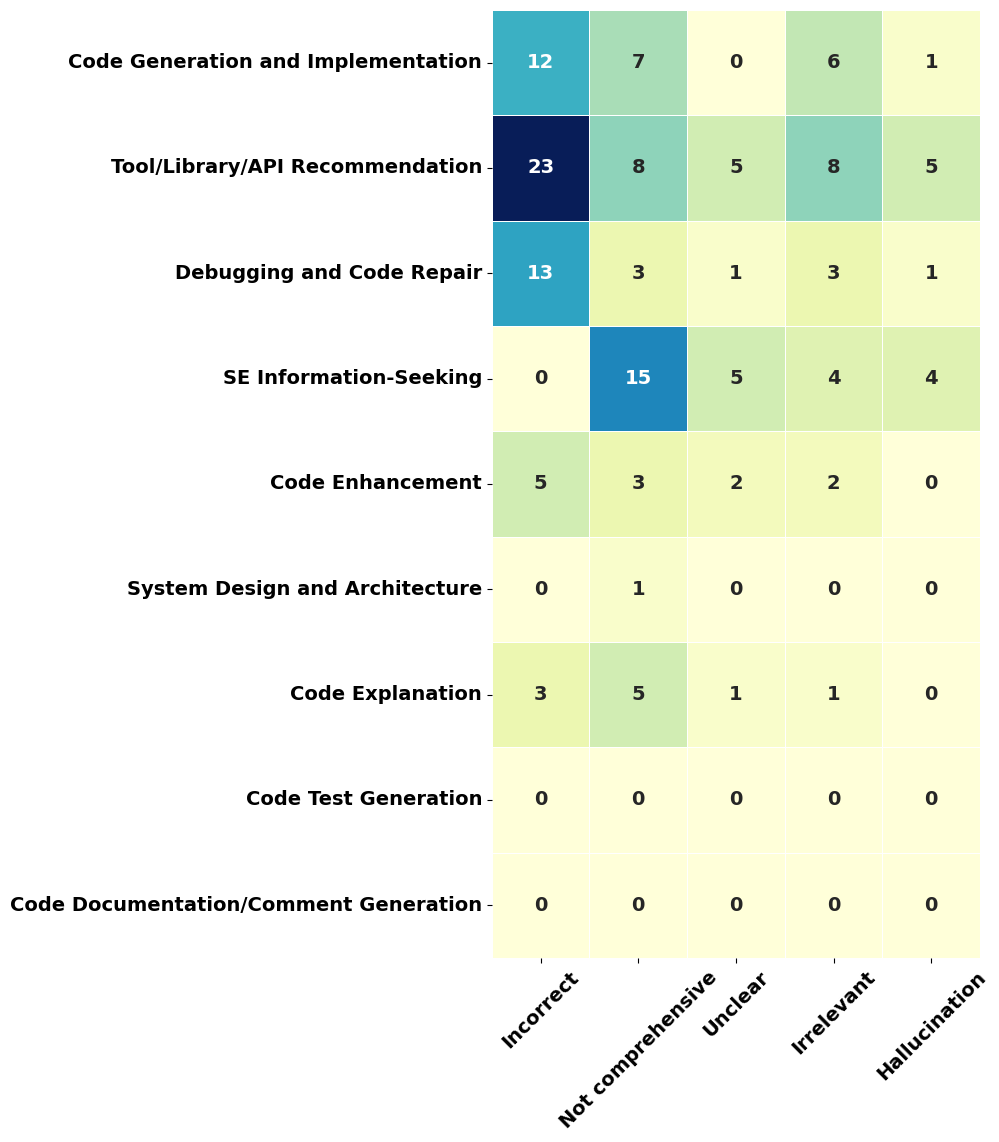

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Updated dataset with new categories
data = {
    "Code Generation and Implementation": {"Incorrect": 12, "Not comprehensive": 7, "Irrelevant": 6, "Hallucination": 1},
    "Tool/Library/API Recommendation": {"Incorrect": 23, "Not comprehensive": 8, "Unclear": 5, "Irrelevant": 8, "Hallucination": 5},
    "Debugging and Code Repair": {"Incorrect": 13, "Not comprehensive": 3, "Unclear": 1, "Irrelevant": 3, "Hallucination": 1},
    "SE Information-Seeking": {"Not comprehensive": 15, "Unclear": 5, "Irrelevant": 4, "Hallucination": 4},
    "Code Enhancement": {"Incorrect": 5, "Not comprehensive": 3, "Unclear": 2, "Irrelevant": 2},
    "System Design and Architecture": {"Not comprehensive": 1},
    "Code Explanation": {"Incorrect": 3, "Not comprehensive": 5, "Unclear": 1, "Irrelevant": 1},
    "Code Test Generation": {"Incorrect": 0, "Not comprehensive": 0, "Unclear": 0, "Irrelevant": 0},
    "Code Documentation/Comment Generation": {"Incorrect": 0, "Not comprehensive": 0, "Unclear": 0, "Irrelevant": 0},
}

# Convert data to DataFrame
df = pd.DataFrame(data).T
df = df[["Incorrect", "Not comprehensive", "Unclear", "Irrelevant", "Hallucination"]].fillna(0).astype(int)

# Create heatmap
plt.figure(figsize=(10, 12))
heatmap = sns.heatmap(df, annot=True, cmap="YlGnBu", fmt="d", cbar=False, linewidths=.5,
                      annot_kws={"size": 14, "fontweight": "bold"})

# Titles
plt.yticks(fontsize=14, weight='bold', rotation=0)

# plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(fontsize=14, weight='bold', rotation=45)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig("deficiencies_heatmap.png", dpi=300)
plt.show()
